# Paket prabayar mana yang menghasilkan lebih banyak pendapatan?

Ini adalah analisis pada perusahaan operator telekomunikasi, Megaline. Perusahaan ini menawarkan klien dua paket prabayar, Surf dan Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.

Kita akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Kami memiliki 500 data klien Megaline: siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018.

# Konten <a id='back'></a>

1. Pendahuluan
    * Tujuan
    
    
2. Pra-pemrosesan Data
    * Memuat Data
    * Mengeksplorasi Data Awal
    * Memperbaiki Tipe Data
    * Memeriksa dan Menangani Nilai-nilai yang Hilang
    * Memeriksa Data dan Eliminasi Kesalahan pada Data
    * Memeriksa Duplikat
    * Kesimpulan Awal


3. Menyiapkan Data untuk Keperluan Analisis
    * Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan dari setiap pengguna
    * Jumlah SMS yang dikirim per bulan dari setiap pengguna
    * Volume data per bulan dari setiap pengguna
    * Pendapatan bulanan dari setiap pengguna
    * Kesimpulan Menengah
    
    
4. Analisis Data
    * Perilaku konsumen pengguna paket surf
    * Perilaku konsumen pengguna paket ultimate
    

5. Menguji Hipotesis
    * Hipotesis 1: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda
    * Hipotesis 2: Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain


6. Kesimpulan Menyeluruh

## Pendahuluan <a id='intro'></a>

Ini adalah analisis pada perusahaan operator telekomunikasi, Megaline. Perusahaan ini menawarkan klien dua paket prabayar, Surf dan Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.

Kita akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Kami memiliki 500 data klien Megaline: siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018.

Kita bertujuan untuk:
1. Menganalisa perilaku konsumen.
2. Menguji dua hipotesis:
    * Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
    * Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.



##  Pra-pemrosesan data



In [1]:
# Muat semua library
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats as st

###  Memuat Data


In [2]:
# Muat file data menjadi DataFrame

data_1 = pd.read_csv('megaline_calls.csv')
data_2 = pd.read_csv('megaline_internet.csv')
data_3 = pd.read_csv('megaline_messages.csv')
data_4 = pd.read_csv('megaline_users.csv')
data_5 = pd.read_csv('megaline_plans.csv')

###  Mengeksplorasi Data Awal
Dataset kita berisi kolom-kolom berikut:

Tabel *`calls`* (data panggilan):
*	*`id`* — ID sesi calls unik
*	*`call_date`* — tanggal panggilan
*	*`duration`* — durasi panggilan (dalam menit)
*	*`user_id`* — ID pengguna yang melakukan panggilan

Tabel *`internet`* (data sesi web):
*	*`id`* — ID sesi web unik
*	*`mb_used`* — volume data yang dihabiskan selama sesi (dalam megabita)
*	*`session_date`* — tanggal sesi web
*	*`user_id`* — ID pengguna

Tabel *`messages`* (data SMS):
*	*`id`* — ID SMS unik
*	*`message_date`* — tanggal SMS dikirim
*	*`user_id`* — ID pengguna yang mengirim SMS

Tabel *`users`* (data pengguna):
*	*`user_id`* — ID pengguna
*	*`first_name`* — nama depan pengguna
*	*`last_name`* — nama belakang pengguna
*	*`age`* — usia pengguna (tahun)
*	*`reg_date`* — tanggal mulai berlangganan (dd, mm, yy)
*	*`churn_date`* — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
*	*`city`* — kota tempat tinggal pengguna
*	*`plan`* — nama paket telepon

Tabel *`plans`* (data paket telepon):
*	*`plan_name`* — nama paket telepon
*	*`usd_monthly_fee`* — biaya bulanan dalam dolar AS
*	*`minutes_included`* — alokasi menit panggilan bulanan
*	*`messages_included`* — alokasi SMS bulanan
*	*`mb_per_month_included`* — alokasi volume data bulanan (dalam megabita)
*	*`usd_per_minute`* — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
*	*`usd_per_message`* — harga per SMS jika telah melebihi batas alokasi paket
*	*`usd_per_gb`* — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)


In [3]:
# Menampilkan informasi/rangkuman umum tentang kelima DataFrame

number = 1
for dataset in data_1, data_2, data_3, data_4, data_5:
    print(f'\ndata info for data_{number}')
    print(dataset.info())
    number += 1


data info for data_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

data info for data_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

data info for data_3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 

In [4]:
#  Menampilkan informasi/rangkuman umum tentang kelima DataFrame

number = 1
for dataset in data_1, data_2, data_3, data_4, data_5:
    print(f'\ndata head for data_{number}')
    print(dataset.head())
    number += 1


data head for data_1
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

data head for data_2
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

data head for data_3
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

data head for data_4
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson

In [5]:
# Menampilkan informasi/rangkuman umum tentang kelima DataFrame

number = 1
for dataset in data_1, data_2, data_3, data_4, data_5:
    print(f'\ndata describe for data_{number}')
    print(dataset.describe())
    number += 1


data describe for data_1
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000

data describe for data_2
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000

data describe for data_3
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000

data describe for data_4
           user_id         age
count   500.000000  500.000000
mean  

###  Memperbaiki Tipe Data

Tipe data bawaan pada kolom call_date, session_date, message_date, reg_date, dan churn_date adalah object, kita akan menggantinya dengan tipe datetime karena kolom tersebut mengandung waktu.

In [6]:
# Mengubah tipe data ke datetime

data_1['call_date'] = data_1['call_date'].apply(pd.to_datetime)
data_2['session_date'] = data_2['session_date'].apply(pd.to_datetime)
data_3['message_date'] = data_3['message_date'].apply(pd.to_datetime)
data_4[['reg_date', 'churn_date']] = data_4[['reg_date', 'churn_date']].apply(pd.to_datetime)


In [7]:
# Memeriksa kembali kolom yang telah diubah tipenya

number = 1
for dataset in data_1, data_2, data_3, data_4, data_5:
    print(f'\ndata sample for data_{number}')
    print(dataset.info())
    number += 1


data sample for data_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None

data sample for data_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), obj

###  Memeriksa dan Menangani Nilai-nilai yang Hilang

#### Memeriksa Nilai-nilai yang Hilang

In [8]:
# Memeriksa distribusi masing-masing nilai yang hilang terhadap keseluruhan data_1 calls

number = 1
for dataset in data_1, data_2, data_3, data_4, data_5:
    print(f'\ndata sample for data_{number}')
    print(dataset.isna().sum() / len(dataset) * 100)
    number += 1


data sample for data_1
id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

data sample for data_2
id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

data sample for data_3
id              0.0
user_id         0.0
message_date    0.0
dtype: float64

data sample for data_4
user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
churn_date    93.2
dtype: float64

data sample for data_5
messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan_name                0.0
dtype: float64


Kolom yang memiliki nilai-nilai yang hilang hanya ada satu, yaitu kolom churn_date dari data_4 (users). Kita akan memperbaikinya dibawah ini.

#### Menangani Nilai-nilai yang Hilang

In [9]:
# menghitung nilai yang hilang di kolom churn_date 
data_4['churn_date'].isna().sum()


466

In [10]:
# Mengisi nilai yang hilang pada kolom churn_date dengan tanggal sesudah data ini dibuat
# karena nilai yang hilang pada kolom ini, berarti paket layanan masih digunakan saat data ini dibuat

today = '2019-01-01'
today = pd.to_datetime(today, format = '%Y-%m-%d')
data_4['churn_date'] = data_4['churn_date'].fillna(today)

In [11]:
# memeriksa kolom churn_date apakah masih ada nilai yang hilang
data_4['churn_date'].isna().sum()


0

In [12]:
# memeriksa distribusi di kolom churn_date

data_4['churn_date'].value_counts()

2019-01-01    466
2018-12-18      3
2018-12-31      2
2018-11-14      2
2018-12-19      2
2018-12-15      1
2018-11-18      1
2018-09-17      1
2018-12-10      1
2018-08-19      1
2018-11-21      1
2018-09-01      1
2018-12-26      1
2018-08-16      1
2018-10-22      1
2018-10-03      1
2018-10-13      1
2018-07-31      1
2018-11-30      1
2018-12-22      1
2018-11-29      1
2018-12-27      1
2018-12-12      1
2018-11-11      1
2018-11-24      1
2018-10-07      1
2018-12-30      1
2018-09-07      1
2018-11-16      1
2018-09-18      1
Name: churn_date, dtype: int64

### Memeriksa data dan eliminasi kesalahan pada data

In [13]:
# Memeriksa data

number = 1
for dataset in data_1, data_2, data_3, data_4, data_5:
    print(f'\ndata sample for data_{number}')
    print(dataset.head())
    number += 1


data sample for data_1
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22

data sample for data_2
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

data sample for data_3
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

data sample for data_4
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkers

In [14]:
data_1['duration'].value_counts()

0.00     26834
4.02       102
8.37       102
3.91       101
4.30       100
         ...  
31.55        1
24.95        1
26.23        1
29.56        1
25.18        1
Name: duration, Length: 2802, dtype: int64

Pada data_1 (calls) kolom duration terdapat data yang 0,0 menit dengan asumsi user melakukan panggilan telepon namun ini panggilan tidak terjawab. Kita akan membagi 2 kategori panggilan terjawab dan panggilan tidak terjawab di kolom baru untuk keperluan analisa nantinya.

In [15]:
# Membuat fungsi: value 1= untuk panggilan terjawab, value 0= untuk panggilan tidak terjawab

duration_category = data_1['duration']

def data_dur (duration_category):
    if duration_category > 0.00:
        return 1
    else:
        return 0

In [16]:
# menambahkan duration_category ke kolom baru

data_1['duration_category'] = data_1['duration'].apply(data_dur)

In [17]:
# memeriksa kolom baru duration_category

data_1.sample(10)

,id,user_id,call_date,duration,duration_category
113957,1400_299,1400,2018-11-01,13.04,1
48808,1175_536,1175,2018-11-12,6.47,1
70222,1251_233,1251,2018-09-26,7.93,1
32743,1123_101,1123,2018-11-12,0.70,1
134109,1488_219,1488,2018-11-13,9.48,1
44691,1161_64,1161,2018-12-09,0.00,0
61248,1220_654,1220,2018-04-26,4.84,1
131399,1472_375,1472,2018-09-25,0.00,0
95075,1337_1,1337,2018-11-28,6.56,1
1626,1009_48,1009,2018-10-31,5.69,1


### Memeriksa Duplikat

In [18]:
# Memeriksa duplikat di data_merge

number = 1
for dataset in data_1, data_2, data_3, data_4, data_5:
    print(f'\ndata sample for data_{number}')
    print(dataset.duplicated().sum())
    number += 1


data sample for data_1
0

data sample for data_2
0

data sample for data_3
0

data sample for data_4
0

data sample for data_5
0


### Kesimpulan Awal


* Tipe data yang tidak sesuai adalah semua kolom yang berhubungan dengan tanggal, yaitu kolom call_date, session_date, message_date, reg_date, dan churn_date. Semuanya diperbaiki dengan mengubahnya ke tipe datetime.

* Nilai-nilai yang hilang di kolom churn_date sebesar 93.2% terhadap data_4 users, ditangani dengan mengisinya dengan tanggal setelah data ini dibuat, agar mudah diingat dipilihlah tanggal 2019-01-01.

* Kolom duration di data_1 calls memiliki nilai 0,0 menit, kami asumsikan itu adalah panggilan telepon yang tidak terjawab. Kami menanganinya dengan membuat kolom baru duration_category dengan value 1= untuk panggilan terjawab, value 0= untuk panggilan tidak terjawab.

* Tidak ada data duplikat di kelima dataset.

## Menyiapkan Data untuk Keperluan Analisis

Untuk setiap pengguna, kami akan menghitung:

* Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
* Jumlah SMS yang dikirim per bulan
* Volume data per bulan
* Pendapatan bulanan dari setiap pengguna (kurangi batas paket gratis dari jumlah total panggilan, SMS, dan  data; kalikan hasilnya dengan nilai paket telepon; tambahkan biaya bulanan tergantung pada paket teleponnya). 
    * Menentukan metode yang tepat untuk menemukan rata-rata jumlah panggilan, SMS, volume data internet dan pendapatan bulanan dari setiap pengguna; apakah membaginya dengan masa berlangganan - dilihat dari sejak reg_date sampai dengan churn_date ATAU membaginya dengan masa pemakaian.

### Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan dari setiap pengguna

Pada langkah ini, kita hanya mengumpulkan dahulu jumlah panggilan yang terjadi setiap bulannya. Perhitungan rata-rata penggunaan per user per bulan akan dilakukan pada tahap 3.4.4.

In [19]:
# Melihat kembali data_1 calls dengan sample

data_1.sample(10)

,id,user_id,call_date,duration,duration_category
134168,1488_303,1488,2018-08-18,6.60,1
45438,1164_137,1164,2018-09-22,2.53,1
130747,1470_196,1470,2018-09-12,4.65,1
50183,1181_512,1181,2018-04-15,6.83,1
57704,1209_25,1209,2018-12-20,11.29,1
111869,1393_46,1393,2018-11-29,0.00,0
47522,1172_113,1172,2018-09-28,4.28,1
116649,1408_298,1408,2018-10-13,5.88,1
93813,1335_41,1335,2018-09-07,16.91,1
755,1004_258,1004,2018-05-27,11.06,1


In [20]:
# Mengambil tahun dan bulan panggilan dari kolom call_date

data_1['year_calls'] = data_1['call_date'].dt.year
data_1['month_calls'] = data_1['call_date'].dt.month
data_1

,id,user_id,call_date,duration,duration_category,year_calls,month_calls
0,1000_93,1000,2018-12-27,8.52,1,2018,12
1,1000_145,1000,2018-12-27,13.66,1,2018,12
2,1000_247,1000,2018-12-27,14.48,1,2018,12
3,1000_309,1000,2018-12-28,5.76,1,2018,12
4,1000_380,1000,2018-12-30,4.22,1,2018,12
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,1,2018,11
137731,1499_200,1499,2018-10-20,10.89,1,2018,10
137732,1499_201,1499,2018-09-21,8.12,1,2018,9
137733,1499_202,1499,2018-10-10,0.37,1,2018,10


In [21]:
# Menambahkan kolom year_month untuk waktu panggilan yang terjadi

data_1['year_month'] = data_1['year_calls'].astype('str') + '_' + data_1['month_calls'].astype('str')
data_1

,id,user_id,call_date,duration,duration_category,year_calls,month_calls,year_month
0,1000_93,1000,2018-12-27,8.52,1,2018,12,2018_12
1,1000_145,1000,2018-12-27,13.66,1,2018,12,2018_12
2,1000_247,1000,2018-12-27,14.48,1,2018,12,2018_12
3,1000_309,1000,2018-12-28,5.76,1,2018,12,2018_12
4,1000_380,1000,2018-12-30,4.22,1,2018,12,2018_12
...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,1,2018,11,2018_11
137731,1499_200,1499,2018-10-20,10.89,1,2018,10,2018_10
137732,1499_201,1499,2018-09-21,8.12,1,2018,9,2018_9
137733,1499_202,1499,2018-10-10,0.37,1,2018,10,2018_10


In [22]:
# Melihat jumlah panggilan setiap user_id disetiap bulannya

calls_time_total = data_1.pivot_table(
    index=['user_id', 'year_month'], values=['duration_category', 'duration'], aggfunc='sum').reset_index()
calls_time_total.columns = ['user_id', 'year_month', 'call_minutes', 'call_times']
calls_time_total


,user_id,year_month,call_minutes,call_times
0,1000,2018_12,116.83,16
1,1001,2018_10,374.11,47
2,1001,2018_11,404.59,49
3,1001,2018_12,392.93,46
4,1001,2018_8,171.14,22
...,...,...,...,...
2253,1498,2018_9,344.62,39
2254,1499,2018_10,363.28,41
2255,1499,2018_11,288.56,39
2256,1499,2018_12,468.10,56


In [23]:
# Reindex kolom call_minutes menjadi kolom terakhir

new_cols = ['user_id', 'year_month', 'call_times', 'call_minutes']

calls_time_total = calls_time_total.reindex(columns=new_cols)
calls_time_total

,user_id,year_month,call_times,call_minutes
0,1000,2018_12,16,116.83
1,1001,2018_10,47,374.11
2,1001,2018_11,49,404.59
3,1001,2018_12,46,392.93
4,1001,2018_8,22,171.14
...,...,...,...,...
2253,1498,2018_9,39,344.62
2254,1499,2018_10,41,363.28
2255,1499,2018_11,39,288.56
2256,1499,2018_12,56,468.10


In [24]:
# Membulatkan jumlah telepon dalam menit ke atas

calls_time_total['call_minutes'] = calls_time_total['call_minutes'].apply(np.ceil)
calls_time_total['call_minutes'] = calls_time_total['call_minutes'].astype(int)
calls_time_total


,user_id,year_month,call_times,call_minutes
0,1000,2018_12,16,117
1,1001,2018_10,47,375
2,1001,2018_11,49,405
3,1001,2018_12,46,393
4,1001,2018_8,22,172
...,...,...,...,...
2253,1498,2018_9,39,345
2254,1499,2018_10,41,364
2255,1499,2018_11,39,289
2256,1499,2018_12,56,469


In [25]:
# Melihat total panggilan yang berhasil terjadi dan menit dari semua pengguna

print('Total panggilan yang berhasil terjadi dari semua pengguna selama 2018 adalah:', calls_time_total['call_times'].sum())
print('Total panggilan dalam menit yang terjadi dari semua pengguna selama 2018 adalah:', calls_time_total['call_minutes'].sum())


Total panggilan yang berhasil terjadi dari semua pengguna selama 2018 adalah: 110901
Total panggilan dalam menit yang terjadi dari semua pengguna selama 2018 adalah: 930284


Total panggilan yang berhasil terjadi dari semua pengguna selama tahun 2018 adalah 110901 panggilan, dengan total menit sebanyak 930289 menit.

### Jumlah SMS yang dikirim per bulan dari setiap pengguna

Pada langkah ini, kita hanya mengumpulkan dahulu jumlah SMS yang terjadi setiap bulannya. Perhitungan rata-rata penggunaan per user per bulan akan dilakukan pada tahap 3.4.4.

In [26]:
# Melihat kembali data_3 SMS dengan sample

data_3.sample(10)

,id,user_id,message_date
26646,1162_22,1162,2018-11-23
47295,1324_7,1324,2018-04-29
20955,1132_103,1132,2018-09-13
37555,1249_9,1249,2018-09-17
58118,1365_274,1365,2018-08-04
4790,1044_169,1044,2018-11-04
74138,1475_272,1475,2018-10-20
54957,1346_469,1346,2018-05-19
62511,1392_286,1392,2018-09-09
60781,1382_502,1382,2018-11-08


In [27]:
# Mengambil tahun dan bulan SMS dari kolom message_date

data_3['year_sms'] = data_3['message_date'].dt.year
data_3['month_sms'] = data_3['message_date'].dt.month
data_3

,id,user_id,message_date,year_sms,month_sms
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12
76047,1497_536,1497,2018-12-24,2018,12
76048,1497_547,1497,2018-12-31,2018,12
76049,1497_558,1497,2018-12-24,2018,12


In [28]:
# Menambahkan kolom year_month untuk setiap SMS yang dilakukan

data_3['year_month'] = data_3['year_sms'].astype('str') + '_' + data_3['month_sms'].astype('str')
data_3

,id,user_id,message_date,year_sms,month_sms,year_month
0,1000_125,1000,2018-12-27,2018,12,2018_12
1,1000_160,1000,2018-12-31,2018,12,2018_12
2,1000_223,1000,2018-12-31,2018,12,2018_12
3,1000_251,1000,2018-12-27,2018,12,2018_12
4,1000_255,1000,2018-12-26,2018,12,2018_12
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12,2018_12
76047,1497_536,1497,2018-12-24,2018,12,2018_12
76048,1497_547,1497,2018-12-31,2018,12,2018_12
76049,1497_558,1497,2018-12-24,2018,12,2018_12


In [29]:
# Melihat jumlah SMS setiap user_id disetiap bulannya

SMS_total = data_3.pivot_table(index=['user_id', 'year_month'], values='id', aggfunc='count').reset_index()
SMS_total.columns = ['user_id', 'year_month', 'SMS_times']
SMS_total

,user_id,year_month,SMS_times
0,1000,2018_12,11
1,1001,2018_10,53
2,1001,2018_11,36
3,1001,2018_12,44
4,1001,2018_8,30
...,...,...,...
1801,1496,2018_11,13
1802,1496,2018_12,11
1803,1496,2018_8,2
1804,1496,2018_9,21


In [30]:
# Melihat total SMS yang dikirimkan dari semua user_id di data_3

print('Total SMS yang dikirimkan dari semua pengguna adalah:', SMS_total['SMS_times'].sum())

Total SMS yang dikirimkan dari semua pengguna adalah: 76051


Total SMS yang dikirimkan dari semua pengguna selama tahun 2018 adalah sebanyak 76051 SMS.

### 	Volume data per bulan dari setiap pengguna

Pada langkah ini, kita hanya mengumpulkan dahulu jumlah pemakaian data internet yang terjadi setiap bulannya. Perhitungan rata-rata penggunaan per user per bulan akan dilakukan pada tahap 3.4.4.

In [31]:
# Melihat kembali data_2 internet dengan sample

data_2.sample(10)

,id,user_id,session_date,mb_used
75898,1357_265,1357,2018-08-22,418.12
26032,1121_125,1121,2018-12-10,10.90
83946,1391_205,1391,2018-09-30,359.71
49074,1220_81,1220,2018-08-16,532.98
19112,1085_186,1085,2018-10-17,322.40
89092,1410_287,1410,2018-10-20,504.40
23884,1110_142,1110,2018-06-15,530.12
87015,1403_363,1403,2018-10-30,270.09
82746,1386_61,1386,2018-12-23,816.69
51348,1231_277,1231,2018-10-07,0.00


In [32]:
# Mengambil tahun dan bulan internet dari kolom session_date

data_2['year_internet'] = data_2['session_date'].dt.year
data_2['month_internet'] = data_2['session_date'].dt.month
data_2

,id,user_id,session_date,mb_used,year_internet,month_internet
0,1000_13,1000,2018-12-29,89.86,2018,12
1,1000_204,1000,2018-12-31,0.00,2018,12
2,1000_379,1000,2018-12-28,660.40,2018,12
3,1000_413,1000,2018-12-26,270.99,2018,12
4,1000_442,1000,2018-12-27,880.22,2018,12
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018,10
104821,1499_216,1499,2018-12-30,304.72,2018,12
104822,1499_217,1499,2018-09-22,292.75,2018,9
104823,1499_218,1499,2018-12-07,0.00,2018,12


In [33]:
# Menambahkan kolom year_month untuk setiap data internet yang dilakukan

data_2['year_month'] = data_2['year_internet'].astype('str') + '_' + data_2['month_internet'].astype('str')
data_2

,id,user_id,session_date,mb_used,year_internet,month_internet,year_month
0,1000_13,1000,2018-12-29,89.86,2018,12,2018_12
1,1000_204,1000,2018-12-31,0.00,2018,12,2018_12
2,1000_379,1000,2018-12-28,660.40,2018,12,2018_12
3,1000_413,1000,2018-12-26,270.99,2018,12,2018_12
4,1000_442,1000,2018-12-27,880.22,2018,12,2018_12
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018,10,2018_10
104821,1499_216,1499,2018-12-30,304.72,2018,12,2018_12
104822,1499_217,1499,2018-09-22,292.75,2018,9,2018_9
104823,1499_218,1499,2018-12-07,0.00,2018,12,2018_12


In [34]:
# Melihat volume data setiap user_id disetiap bulannya

internet_total = data_2.pivot_table(
    index=['user_id', 'year_month'], values='mb_used', aggfunc='sum').reset_index()
internet_total.columns = ['user_id', 'year_month', 'mb_total_used']
internet_total

,user_id,year_month,mb_total_used
0,1000,2018_12,1901.47
1,1001,2018_10,22330.49
2,1001,2018_11,18504.30
3,1001,2018_12,19369.18
4,1001,2018_8,6919.15
...,...,...,...
2272,1498,2018_9,22827.28
2273,1499,2018_10,19492.43
2274,1499,2018_11,16813.83
2275,1499,2018_12,22059.21


In [35]:
# Melihat total volume data yang digunakan dari semua user_id di data_2

print('Total volume data yang digunakan dari semua pengguna adalah:', internet_total['mb_total_used'].sum())


Total volume data yang digunakan dari semua pengguna adalah: 38440763.71000001


Total volume data yang digunakan dari semua pengguna selama tahun 2018 adalah 38440763.70999999 atau sekitar 37539.8076 GB. Perhitungan rata-rata pemakaian per user per bulan yang dikonversi ke satuan GB akan dihitung pada langkah selanjutanya, di part 3.4.4.

### 	Pendapatan bulanan dari setiap pengguna


#### 	Menghitung pendapatan tambahan bulanan dari excess pemakaian setiap pengguna - berdasarkan pemakaian panggilan

Langkah-langkahnya:
1. Menggabungkan data calls_time_total dengan data_4 users dan data_5 plans untuk keperluan analisis ini.
2. Menghitung kelebihan pemakaian total panggilan masing-masing pengguna dengan menguranginya dari kuota gratisnya.
3. Dari hasil poin 2, apabila terdapat kelebihan, maka akan dikalikan dengan biaya tambahan panggilan tergantung pada paket teleponnya.
4. Dari perhitungan poin 3 dicari total pendapatan setiap bulan dari masing-masing jenis paket.

In [36]:
# Melihat data calls_time_total

calls_time_total

,user_id,year_month,call_times,call_minutes
0,1000,2018_12,16,117
1,1001,2018_10,47,375
2,1001,2018_11,49,405
3,1001,2018_12,46,393
4,1001,2018_8,22,172
...,...,...,...,...
2253,1498,2018_9,39,345
2254,1499,2018_10,41,364
2255,1499,2018_11,39,289
2256,1499,2018_12,56,469


In [37]:
# Menggabungkan data calls_time_total dengan data_4 users untuk mendapatkan plan per masing-masing pengguna

data_income_calls = calls_time_total.merge(right=data_4, on='user_id', how='left')
data_income_calls.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date'], axis=1, inplace=True)
data_income_calls.columns = ['user_id', 'year_month', 'call_times', 'call_minutes', 'plan_name']
data_income_calls


,user_id,year_month,call_times,call_minutes,plan_name
0,1000,2018_12,16,117,ultimate
1,1001,2018_10,47,375,surf
2,1001,2018_11,49,405,surf
3,1001,2018_12,46,393,surf
4,1001,2018_8,22,172,surf
...,...,...,...,...,...
2253,1498,2018_9,39,345,surf
2254,1499,2018_10,41,364,surf
2255,1499,2018_11,39,289,surf
2256,1499,2018_12,56,469,surf


In [38]:
# Menggabungkan data data_income_calls dengan data_5 plans users untuk mendapatkan detail plan paket

data_income_calls = data_income_calls.merge(right=data_5, on='plan_name', how='left')
data_income_calls.drop(['messages_included', 'mb_per_month_included', 'usd_per_gb', 'usd_per_message'], 
                       axis=1, inplace=True)
data_income_calls

,user_id,year_month,call_times,call_minutes,plan_name,minutes_included,usd_monthly_pay,usd_per_minute
0,1000,2018_12,16,117,ultimate,3000,70,0.01
1,1001,2018_10,47,375,surf,500,20,0.03
2,1001,2018_11,49,405,surf,500,20,0.03
3,1001,2018_12,46,393,surf,500,20,0.03
4,1001,2018_8,22,172,surf,500,20,0.03
...,...,...,...,...,...,...,...,...
2253,1498,2018_9,39,345,surf,500,20,0.03
2254,1499,2018_10,41,364,surf,500,20,0.03
2255,1499,2018_11,39,289,surf,500,20,0.03
2256,1499,2018_12,56,469,surf,500,20,0.03


In [39]:
# Reindex kolom plan_name ke user_id & kolom usd_monthly_pay menjadi kolom terakhir 

new_cols = ['user_id', 'plan_name', 'year_month', 'call_times', 'call_minutes', 'minutes_included', 'usd_per_minute', 
            'usd_monthly_pay']

data_income_calls = data_income_calls.reindex(columns=new_cols)
data_income_calls

,user_id,plan_name,year_month,call_times,call_minutes,minutes_included,usd_per_minute,usd_monthly_pay
0,1000,ultimate,2018_12,16,117,3000,0.01,70
1,1001,surf,2018_10,47,375,500,0.03,20
2,1001,surf,2018_11,49,405,500,0.03,20
3,1001,surf,2018_12,46,393,500,0.03,20
4,1001,surf,2018_8,22,172,500,0.03,20
...,...,...,...,...,...,...,...,...
2253,1498,surf,2018_9,39,345,500,0.03,20
2254,1499,surf,2018_10,41,364,500,0.03,20
2255,1499,surf,2018_11,39,289,500,0.03,20
2256,1499,surf,2018_12,56,469,500,0.03,20


In [40]:
# Memeriksa kembali distribusi masing-masing kolom di data_income_calls

data_income_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2258 non-null   int64  
 1   plan_name         2258 non-null   object 
 2   year_month        2258 non-null   object 
 3   call_times        2258 non-null   int64  
 4   call_minutes      2258 non-null   int64  
 5   minutes_included  2258 non-null   int64  
 6   usd_per_minute    2258 non-null   float64
 7   usd_monthly_pay   2258 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 158.8+ KB


In [41]:
# Memeriksa kembali apakah ada nilai yang hilang di data_income_calls

data_income_calls.isna().sum()

user_id             0
plan_name           0
year_month          0
call_times          0
call_minutes        0
minutes_included    0
usd_per_minute      0
usd_monthly_pay     0
dtype: int64

In [42]:
# Menghitung kelebihan pemakaian panggilan yang dilakukan pengguna
# Menambahkan kolom calls_excess ke DataFrame data_income_calls
# Pemakaian telepon di bulan tertentu < paket telepon yang dimiliki, alih-alih minus, dikolom excess diganti = 0

data_income_calls['calls_excess'] = data_income_calls['call_minutes'] - data_income_calls['minutes_included']
data_income_calls.loc[(data_income_calls['calls_excess'] < 0), 'calls_excess'] = 0
data_income_calls.sample(frac=0.1)

,user_id,plan_name,year_month,call_times,call_minutes,minutes_included,usd_per_minute,usd_monthly_pay,calls_excess
363,1077,ultimate,2018_12,84,798,3000,0.01,70,0
1219,1262,surf,2018_12,29,276,500,0.03,20,0
1487,1329,ultimate,2018_9,130,1155,3000,0.01,70,0
1524,1336,surf,2018_6,94,893,500,0.03,20,393
1263,1274,ultimate,2018_12,39,335,3000,0.01,70,0
...,...,...,...,...,...,...,...,...,...
1209,1261,surf,2018_11,60,534,500,0.03,20,34
1253,1270,ultimate,2018_10,53,482,3000,0.01,70,0
1709,1374,surf,2018_7,46,357,500,0.03,20,0
1024,1220,surf,2018_8,53,545,500,0.03,20,45


In [43]:
# Menghitung biaya dari kelebihan pemakaian panggilan yang dilakukan pengguna

data_income_calls['overcall_charges'] = data_income_calls['calls_excess'] * data_income_calls['usd_per_minute']
data_income_calls['overcall_charges'] = data_income_calls['overcall_charges'].round(decimals = 2)
data_income_calls.sample(frac=0.1)

,user_id,plan_name,year_month,call_times,call_minutes,minutes_included,usd_per_minute,usd_monthly_pay,calls_excess,overcall_charges
401,1084,surf,2018_10,26,219,500,0.03,20,0,0.00
42,1010,surf,2018_6,61,525,500,0.03,20,25,0.75
1105,1241,surf,2018_11,69,575,500,0.03,20,75,2.25
1043,1224,ultimate,2018_9,28,175,3000,0.01,70,0,0.00
1346,1296,ultimate,2018_10,16,140,3000,0.01,70,0,0.00
...,...,...,...,...,...,...,...,...,...,...
1756,1385,surf,2018_8,37,283,500,0.03,20,0,0.00
1844,1403,ultimate,2018_3,8,67,3000,0.01,70,0,0.00
470,1100,surf,2018_9,49,472,500,0.03,20,0,0.00
85,1024,surf,2018_12,64,531,500,0.03,20,31,0.93


In [44]:
# Melihat gambaran umum dari masing-masing kolom

data_income_calls.describe()

,user_id,call_times,call_minutes,minutes_included,usd_per_minute,usd_monthly_pay,calls_excess,overcall_charges
count,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000
mean,1247.175819,49.114703,411.994686,1289.415412,0.023685,35.788308,34.117360,1.023521
std,143.344211,25.698253,219.294014,1162.308107,0.009298,23.246162,94.705808,2.841174
min,1000.000000,0.000000,0.000000,500.000000,0.010000,20.000000,0.000000,0.000000
25%,1122.000000,32.000000,259.000000,500.000000,0.010000,20.000000,0.000000,0.000000
50%,1246.000000,48.000000,405.000000,500.000000,0.030000,20.000000,0.000000,0.000000
75%,1370.000000,64.000000,543.750000,3000.000000,0.030000,70.000000,0.000000,0.000000
max,1499.000000,167.000000,1432.000000,3000.000000,0.030000,70.000000,932.000000,27.960000


In [45]:
# Melihat data bagaimana pendapatan yang didapat dari kelebihan penggunaan telepon di masing-masing bulannya

overcall_charges_per_month = data_income_calls.pivot_table(
    index=['plan_name', 'year_month'], values='overcall_charges', aggfunc='sum').reset_index()
overcall_charges_per_month

,plan_name,year_month,overcall_charges
0,surf,2018_1,0.00
1,surf,2018_10,337.53
2,surf,2018_11,390.63
3,surf,2018_12,662.94
4,surf,2018_2,8.10
5,surf,2018_3,12.84
6,surf,2018_4,40.32
7,surf,2018_5,97.83
8,surf,2018_6,122.22
9,surf,2018_7,211.80


Pengguna yang memakai jenis paket telepon surf lebih banyak mengalami tambahan charges atas penggunaan telepon setelah kuota telepon gratisnya habis. Hal ini karena kuota telepon gratis jenis surf hanya 500 menit. Sementara, pengguna yang memakai jenis paket telepon ultimate masih aman, tidak ada yang melebihi kuota gratisnya, yaitu 1000 menit sehingga tidak charges tambahan yang dikenakan kepada jenis pengguna ini.

#### 	Menghitung pendapatan tambahan bulanan dari excess pemakaian setiap pengguna - berdasarkan pemakaian SMS

Langkah-langkahnya:
1. Menggabungkan data SMS_total dengan data_4 users dan data_5 plans untuk keperluan analisis ini.
2. Menghitung kelebihan pemakaian total SMS masing-masing pengguna dengan menguranginya dari kuota gratisnya.
3. Dari hasil poin 2, apabila terdapat kelebihan, maka akan dikalikan dengan biaya tambahan SMS tergantung pada paket teleponnya.
4. Dari perhitungan poin 3 dicari total pendapatan setiap bulan dari masing-masing jenis paket.

In [46]:
# Melihat data SMS_total

SMS_total

,user_id,year_month,SMS_times
0,1000,2018_12,11
1,1001,2018_10,53
2,1001,2018_11,36
3,1001,2018_12,44
4,1001,2018_8,30
...,...,...,...
1801,1496,2018_11,13
1802,1496,2018_12,11
1803,1496,2018_8,2
1804,1496,2018_9,21


In [47]:
# Menggabungkan data SMS_total dengan data_4 users untuk mendapatkan plan per masing-masing pengguna

data_income_SMS = SMS_total.merge(right=data_4, on='user_id', how='left')
data_income_SMS.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date'], axis=1, inplace=True)
data_income_SMS.columns = ['user_id', 'year_month', 'SMS_times', 'plan_name']
data_income_SMS


,user_id,year_month,SMS_times,plan_name
0,1000,2018_12,11,ultimate
1,1001,2018_10,53,surf
2,1001,2018_11,36,surf
3,1001,2018_12,44,surf
4,1001,2018_8,30,surf
...,...,...,...,...
1801,1496,2018_11,13,surf
1802,1496,2018_12,11,surf
1803,1496,2018_8,2,surf
1804,1496,2018_9,21,surf


In [48]:
# Menggabungkan data data_income_SMS dengan data_5 plans users untuk mendapatkan detail plan paket

data_income_SMS = data_income_SMS.merge(right=data_5, on='plan_name', how='left')
data_income_SMS.drop(['mb_per_month_included', 'minutes_included', 'usd_per_gb', 'usd_per_minute'],
                     axis=1, inplace=True)
data_income_SMS

,user_id,year_month,SMS_times,plan_name,messages_included,usd_monthly_pay,usd_per_message
0,1000,2018_12,11,ultimate,1000,70,0.01
1,1001,2018_10,53,surf,50,20,0.03
2,1001,2018_11,36,surf,50,20,0.03
3,1001,2018_12,44,surf,50,20,0.03
4,1001,2018_8,30,surf,50,20,0.03
...,...,...,...,...,...,...,...
1801,1496,2018_11,13,surf,50,20,0.03
1802,1496,2018_12,11,surf,50,20,0.03
1803,1496,2018_8,2,surf,50,20,0.03
1804,1496,2018_9,21,surf,50,20,0.03


In [49]:
# Reindex kolom plan_name ke user_id & kolom usd_monthly_pay menjadi kolom terakhir 

new_cols = ['user_id', 'plan_name', 'year_month', 'SMS_times', 'messages_included', 'usd_per_message', 
            'usd_monthly_pay']

data_income_SMS = data_income_SMS.reindex(columns=new_cols)
data_income_SMS

,user_id,plan_name,year_month,SMS_times,messages_included,usd_per_message,usd_monthly_pay
0,1000,ultimate,2018_12,11,1000,0.01,70
1,1001,surf,2018_10,53,50,0.03,20
2,1001,surf,2018_11,36,50,0.03,20
3,1001,surf,2018_12,44,50,0.03,20
4,1001,surf,2018_8,30,50,0.03,20
...,...,...,...,...,...,...,...
1801,1496,surf,2018_11,13,50,0.03,20
1802,1496,surf,2018_12,11,50,0.03,20
1803,1496,surf,2018_8,2,50,0.03,20
1804,1496,surf,2018_9,21,50,0.03,20


In [50]:
# Memeriksa kembali distribusi masing-masing kolom di data_income_SMS

data_income_SMS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 0 to 1805
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1806 non-null   int64  
 1   plan_name          1806 non-null   object 
 2   year_month         1806 non-null   object 
 3   SMS_times          1806 non-null   int64  
 4   messages_included  1806 non-null   int64  
 5   usd_per_message    1806 non-null   float64
 6   usd_monthly_pay    1806 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 112.9+ KB


In [51]:
# Memeriksa kembali apakah ada nilai yang hilang di data_income_SMS

data_income_SMS.isna().sum()

user_id              0
plan_name            0
year_month           0
SMS_times            0
messages_included    0
usd_per_message      0
usd_monthly_pay      0
dtype: int64

In [52]:
# Menghitung kelebihan pemakaian SMS yang dilakukan pengguna
# Menambahkan kolom SMS_excess ke DataFrame data_income_SMS
# Pemakaian SMS di bulan tertentu < paket telepon yang dimiliki, alih-alih minus, dikolom excess diganti = 0

data_income_SMS['SMS_excess'] = data_income_SMS['SMS_times'] - data_income_SMS['messages_included']
data_income_SMS.loc[(data_income_SMS['SMS_excess'] < 0), 'SMS_excess'] = 0
data_income_SMS.sample(frac=0.1)

,user_id,plan_name,year_month,SMS_times,messages_included,usd_per_message,usd_monthly_pay,SMS_excess
854,1231,ultimate,2018_11,3,1000,0.01,70,0
1710,1467,ultimate,2018_9,64,1000,0.01,70,0
1142,1312,surf,2018_10,39,50,0.03,20,0
1206,1328,surf,2018_12,168,50,0.03,20,118
126,1044,surf,2018_9,47,50,0.03,20,0
...,...,...,...,...,...,...,...,...
1237,1334,surf,2018_8,14,50,0.03,20,0
1487,1399,surf,2018_9,23,50,0.03,20,0
186,1060,surf,2018_12,83,50,0.03,20,33
1164,1316,surf,2018_12,70,50,0.03,20,20


In [53]:
# Menghitung biaya dari kelebihan pemakaian SMS yang dilakukan pengguna

data_income_SMS['over_SMS_charges'] = data_income_SMS['SMS_excess'] * data_income_SMS['usd_per_message']
data_income_SMS['over_SMS_charges'] = data_income_SMS['over_SMS_charges'].round(decimals = 2)
data_income_SMS.sample(frac=0.1)

,user_id,plan_name,year_month,SMS_times,messages_included,usd_per_message,usd_monthly_pay,SMS_excess,over_SMS_charges
603,1163,ultimate,2018_8,4,1000,0.01,70,0,0.00
525,1141,surf,2018_6,3,50,0.03,20,0,0.00
1642,1448,surf,2018_12,59,50,0.03,20,9,0.27
809,1214,ultimate,2018_6,13,1000,0.01,70,0,0.00
1212,1328,surf,2018_9,153,50,0.03,20,103,3.09
...,...,...,...,...,...,...,...,...,...
1017,1264,ultimate,2018_11,65,1000,0.01,70,0,0.00
1473,1395,ultimate,2018_12,25,1000,0.01,70,0,0.00
1236,1334,surf,2018_7,18,50,0.03,20,0,0.00
893,1241,surf,2018_9,20,50,0.03,20,0,0.00


In [54]:
# Melihat gambaran umum dari masing-masing kolom

data_income_SMS.describe()

,user_id,SMS_times,messages_included,usd_per_message,usd_monthly_pay,SMS_excess,over_SMS_charges
count,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000
mean,1245.091916,42.110188,357.198228,0.023533,36.168328,6.107973,0.183239
std,139.583315,33.122931,444.496306,0.009358,23.394542,18.322291,0.549669
min,1000.000000,1.000000,50.000000,0.010000,20.000000,0.000000,0.000000
25%,1126.250000,17.000000,50.000000,0.010000,20.000000,0.000000,0.000000
50%,1245.000000,34.000000,50.000000,0.030000,20.000000,0.000000,0.000000
75%,1362.000000,59.000000,1000.000000,0.030000,70.000000,0.000000,0.000000
max,1497.000000,266.000000,1000.000000,0.030000,70.000000,216.000000,6.480000


In [55]:
# Melihat data bagaimana pendapatan yang didapat dari kelebihan penggunaan SMS di masing-masing bulannya

over_SMS_charges_per_month = data_income_SMS.pivot_table(
    index=['plan_name', 'year_month'], values='over_SMS_charges', aggfunc='sum').reset_index()
over_SMS_charges_per_month

,plan_name,year_month,over_SMS_charges
0,surf,2018_1,0.00
1,surf,2018_10,59.58
2,surf,2018_11,59.64
3,surf,2018_12,101.46
4,surf,2018_2,0.24
5,surf,2018_3,0.39
6,surf,2018_4,2.61
7,surf,2018_5,9.66
8,surf,2018_6,14.49
9,surf,2018_7,17.58


Pengguna yang memakai jenis paket telepon surf lebih banyak mengalami tambahan charges atas penggunaan SMS setelah kuota SMS gratisnya habis. Hal ini karena kuota telepon gratis jenis surf hanya 50 SMS. Sementara, pengguna yang memakai jenis paket telepon ultimate masih aman, tidak ada yang melebihi kuota gratisnya sehingga tidak charges tambahan yang dikenakan kepada jenis pengguna ini.

#### 	Menghitung pendapatan tambahan bulanan dari excess pemakaian setiap pengguna - berdasarkan pemakaian data internet

Langkah-langkahnya:
1. Menggabungkan data internets_total dengan data_4 users dan data_5 plans untuk keperluan analisis ini.
2. Menghitung kelebihan pemakaian total data internet masing-masing pengguna dengan menguranginya dari kuota gratisnya. Dimana, untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.
3. Dari hasil poin 2, apabila terdapat kelebihan, maka akan dikalikan dengan biaya tambahan data internet tergantung pada paket teleponnya.
4. Perhitungan poin 3 dicari total pendapatan setiap bulan dari masing-masing jenis paket.

In [56]:
# Melihat data internet_total

internet_total

,user_id,year_month,mb_total_used
0,1000,2018_12,1901.47
1,1001,2018_10,22330.49
2,1001,2018_11,18504.30
3,1001,2018_12,19369.18
4,1001,2018_8,6919.15
...,...,...,...
2272,1498,2018_9,22827.28
2273,1499,2018_10,19492.43
2274,1499,2018_11,16813.83
2275,1499,2018_12,22059.21


In [57]:
# Menggabungkan data internet_total dengan data_4 users untuk mendapatkan plan per masing-masing pengguna

data_income_internet = internet_total.merge(right=data_4, on='user_id', how='left')
data_income_internet.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date'], axis=1, inplace=True)
data_income_internet.columns = ['user_id', 'year_month', 'mb_total_used', 'plan_name']
data_income_internet


,user_id,year_month,mb_total_used,plan_name
0,1000,2018_12,1901.47,ultimate
1,1001,2018_10,22330.49,surf
2,1001,2018_11,18504.30,surf
3,1001,2018_12,19369.18,surf
4,1001,2018_8,6919.15,surf
...,...,...,...,...
2272,1498,2018_9,22827.28,surf
2273,1499,2018_10,19492.43,surf
2274,1499,2018_11,16813.83,surf
2275,1499,2018_12,22059.21,surf


In [58]:
# Menggabungkan data internet_total dengan data_5 plans users untuk mendapatkan detail plan paket

data_income_internet = data_income_internet.merge(right=data_5, on='plan_name', how='left')
data_income_internet.drop(['messages_included', 'minutes_included', 'usd_per_message', 'usd_per_minute'],
                          axis=1, inplace=True)
data_income_internet

,user_id,year_month,mb_total_used,plan_name,mb_per_month_included,usd_monthly_pay,usd_per_gb
0,1000,2018_12,1901.47,ultimate,30720,70,7
1,1001,2018_10,22330.49,surf,15360,20,10
2,1001,2018_11,18504.30,surf,15360,20,10
3,1001,2018_12,19369.18,surf,15360,20,10
4,1001,2018_8,6919.15,surf,15360,20,10
...,...,...,...,...,...,...,...
2272,1498,2018_9,22827.28,surf,15360,20,10
2273,1499,2018_10,19492.43,surf,15360,20,10
2274,1499,2018_11,16813.83,surf,15360,20,10
2275,1499,2018_12,22059.21,surf,15360,20,10


In [59]:
# Reindex kolom plan_name ke user_id & kolom usd_monthly_pay menjadi kolom terakhir 

new_cols = ['user_id', 'plan_name', 'year_month', 'mb_total_used', 'mb_per_month_included', 'usd_per_gb', 
            'usd_monthly_pay']

data_income_internet = data_income_internet.reindex(columns=new_cols)
data_income_internet

,user_id,plan_name,year_month,mb_total_used,mb_per_month_included,usd_per_gb,usd_monthly_pay
0,1000,ultimate,2018_12,1901.47,30720,7,70
1,1001,surf,2018_10,22330.49,15360,10,20
2,1001,surf,2018_11,18504.30,15360,10,20
3,1001,surf,2018_12,19369.18,15360,10,20
4,1001,surf,2018_8,6919.15,15360,10,20
...,...,...,...,...,...,...,...
2272,1498,surf,2018_9,22827.28,15360,10,20
2273,1499,surf,2018_10,19492.43,15360,10,20
2274,1499,surf,2018_11,16813.83,15360,10,20
2275,1499,surf,2018_12,22059.21,15360,10,20


In [60]:
# Mengkonversi satuan mb ke gb di kolom baru
# Untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Tetapi, total untuk sebulan dibulatkan ke atas. 
# Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.

data_income_internet['gb_total_used'] = data_income_internet['mb_total_used'] / 1024
data_income_internet['gb_total_used'] = data_income_internet['gb_total_used'].apply(np.ceil)

data_income_internet['gb_per_month_included'] = data_income_internet['mb_per_month_included'] / 1024

data_income_internet

,user_id,plan_name,year_month,mb_total_used,mb_per_month_included,usd_per_gb,usd_monthly_pay,gb_total_used,gb_per_month_included
0,1000,ultimate,2018_12,1901.47,30720,7,70,2.0,30.0
1,1001,surf,2018_10,22330.49,15360,10,20,22.0,15.0
2,1001,surf,2018_11,18504.30,15360,10,20,19.0,15.0
3,1001,surf,2018_12,19369.18,15360,10,20,19.0,15.0
4,1001,surf,2018_8,6919.15,15360,10,20,7.0,15.0
...,...,...,...,...,...,...,...,...,...
2272,1498,surf,2018_9,22827.28,15360,10,20,23.0,15.0
2273,1499,surf,2018_10,19492.43,15360,10,20,20.0,15.0
2274,1499,surf,2018_11,16813.83,15360,10,20,17.0,15.0
2275,1499,surf,2018_12,22059.21,15360,10,20,22.0,15.0


In [61]:
# Memeriksa kembali distribusi masing-masing kolom di data_income_internet

data_income_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2276
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2277 non-null   int64  
 1   plan_name              2277 non-null   object 
 2   year_month             2277 non-null   object 
 3   mb_total_used          2277 non-null   float64
 4   mb_per_month_included  2277 non-null   int64  
 5   usd_per_gb             2277 non-null   int64  
 6   usd_monthly_pay        2277 non-null   int64  
 7   gb_total_used          2277 non-null   float64
 8   gb_per_month_included  2277 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 177.9+ KB


In [62]:
# Memeriksa kembali apakah ada nilai yang hilang di data_income_internet

data_income_internet.isna().sum()

user_id                  0
plan_name                0
year_month               0
mb_total_used            0
mb_per_month_included    0
usd_per_gb               0
usd_monthly_pay          0
gb_total_used            0
gb_per_month_included    0
dtype: int64

In [63]:
# Menghitung kelebihan pemakaian data internet yang dilakukan pengguna
# Menambahkan kolom gb_internet_excess ke DataFrame data_income_internet
# Pemakaian data internet bulan tertentu < paket telepon yang dimiliki, alih-alih minus, dikolom excess diganti = 0

data_income_internet['gb_internet_excess'] = data_income_internet['gb_total_used'] - data_income_internet['gb_per_month_included']
data_income_internet.loc[(data_income_internet['gb_internet_excess'] < 0), 'gb_internet_excess'] = 0
data_income_internet


,user_id,plan_name,year_month,mb_total_used,mb_per_month_included,usd_per_gb,usd_monthly_pay,gb_total_used,gb_per_month_included,gb_internet_excess
0,1000,ultimate,2018_12,1901.47,30720,7,70,2.0,30.0,0.0
1,1001,surf,2018_10,22330.49,15360,10,20,22.0,15.0,7.0
2,1001,surf,2018_11,18504.30,15360,10,20,19.0,15.0,4.0
3,1001,surf,2018_12,19369.18,15360,10,20,19.0,15.0,4.0
4,1001,surf,2018_8,6919.15,15360,10,20,7.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2272,1498,surf,2018_9,22827.28,15360,10,20,23.0,15.0,8.0
2273,1499,surf,2018_10,19492.43,15360,10,20,20.0,15.0,5.0
2274,1499,surf,2018_11,16813.83,15360,10,20,17.0,15.0,2.0
2275,1499,surf,2018_12,22059.21,15360,10,20,22.0,15.0,7.0


In [64]:
# Menghitung biaya dari kelebihan pemakaian data internet yang dilakukan pengguna

data_income_internet['over_internet_charges'] = data_income_internet['gb_internet_excess'] * data_income_internet['usd_per_gb']
data_income_internet['over_internet_charges'] = data_income_internet['over_internet_charges'].round(decimals = 1)
data_income_internet.head()



,user_id,plan_name,year_month,mb_total_used,mb_per_month_included,usd_per_gb,usd_monthly_pay,gb_total_used,gb_per_month_included,gb_internet_excess,over_internet_charges
0,1000,ultimate,2018_12,1901.47,30720,7,70,2.0,30.0,0.0,0.0
1,1001,surf,2018_10,22330.49,15360,10,20,22.0,15.0,7.0,70.0
2,1001,surf,2018_11,18504.30,15360,10,20,19.0,15.0,4.0,40.0
3,1001,surf,2018_12,19369.18,15360,10,20,19.0,15.0,4.0,40.0
4,1001,surf,2018_8,6919.15,15360,10,20,7.0,15.0,0.0,0.0


In [65]:
# Melihat gambaran umum dari masing-masing kolom

data_income_internet.describe()

,user_id,mb_total_used,mb_per_month_included,usd_per_gb,usd_monthly_pay,gb_total_used,gb_per_month_included,gb_internet_excess,over_internet_charges
count,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000
mean,1244.925780,16882.197501,20210.171278,9.052701,35.788318,16.989021,19.736495,2.774704,27.433465
std,142.544823,7869.784848,7141.208996,1.394767,23.246123,7.693683,6.973837,4.896621,48.688228
min,1000.000000,92.310000,15360.000000,7.000000,20.000000,1.000000,15.000000,0.000000,0.000000
25%,1121.000000,12347.720000,15360.000000,7.000000,20.000000,13.000000,15.000000,0.000000,0.000000
50%,1243.000000,16873.740000,15360.000000,10.000000,20.000000,17.000000,15.000000,0.000000,0.000000
75%,1367.000000,21041.520000,30720.000000,10.000000,70.000000,21.000000,30.000000,4.000000,40.000000
max,1499.000000,70931.590000,30720.000000,10.000000,70.000000,70.000000,30.000000,55.000000,550.000000


In [66]:
# Melihat data bagaimana pendapatan yang didapat dari kelebihan penggunaan data internet di masing-masing bulannya

over_internet_charges_per_month = data_income_internet.pivot_table(
    index=['plan_name','year_month'], values='over_internet_charges', aggfunc='sum').reset_index()
over_internet_charges_per_month

,plan_name,year_month,over_internet_charges
0,surf,2018_1,0.0
1,surf,2018_10,10280.0
2,surf,2018_11,10200.0
3,surf,2018_12,15170.0
4,surf,2018_2,120.0
5,surf,2018_3,580.0
6,surf,2018_4,980.0
7,surf,2018_5,1990.0
8,surf,2018_6,2670.0
9,surf,2018_7,4880.0


Pengguna yang memakai jenis paket telepon surf lebih banyak mengalami tambahan charges atas penggunaan data internet setelah kuota gratisnya habis. Hal ini karena kuota telepon gratis surf hanya 15 GB. Sementara pengguna paket telepon ultimate hanya sedikit membayar kelebihan data internet yang dipakai, karena kuota gratisnya sampai 30 GB.

#### Menghitung biaya bulanan masing-masing pengguna tergantung langganan paketnya - termasuk charges dari excess

##### Menggabungkan semua data income dari panggilan, SMS, dan data internet berdasarkan pengguna

In [67]:
# Melihat dimensi kolom dan baris dari data_income_calls

data_income_calls.shape

(2258, 10)

In [68]:
# Melihat dimensi kolom dan barisdari data_income_SMS

data_income_SMS.shape

(1806, 9)

In [69]:
# Melihat dimensi kolom dan baris dari data_income_internet

data_income_internet.shape

(2277, 11)

In [70]:
# Menggabungkan semua data income dari panggilan, SMS, dan data internet berdasarkan user_id & year_month

monthly_income_users = data_income_calls.merge(data_income_SMS, on=['user_id', 'year_month'], how='outer').merge(data_income_internet, on=['user_id', 'year_month'], how='outer')


monthly_income_users = monthly_income_users[['user_id', 'plan_name', 'usd_monthly_pay', 'year_month', 'call_minutes',
                                             'minutes_included', 'usd_per_minute', 'calls_excess', 'overcall_charges',
                                             'SMS_times', 'messages_included', 'usd_per_message', 'SMS_excess',
                                             'over_SMS_charges', 'usd_per_gb', 'gb_total_used', 'gb_per_month_included',
                                             'gb_internet_excess', 'over_internet_charges']]
monthly_income_users


,user_id,plan_name,usd_monthly_pay,year_month,call_minutes,minutes_included,usd_per_minute,calls_excess,overcall_charges,SMS_times,messages_included,usd_per_message,SMS_excess,over_SMS_charges,usd_per_gb,gb_total_used,gb_per_month_included,gb_internet_excess,over_internet_charges
0,1000,ultimate,70.0,2018_12,117.0,3000.0,0.01,0.0,0.0,11.0,1000.0,0.01,0.0,0.00,7.0,2.0,30.0,0.0,0.0
1,1001,surf,20.0,2018_10,375.0,500.0,0.03,0.0,0.0,53.0,50.0,0.03,3.0,0.09,10.0,22.0,15.0,7.0,70.0
2,1001,surf,20.0,2018_11,405.0,500.0,0.03,0.0,0.0,36.0,50.0,0.03,0.0,0.00,10.0,19.0,15.0,4.0,40.0
3,1001,surf,20.0,2018_12,393.0,500.0,0.03,0.0,0.0,44.0,50.0,0.03,0.0,0.00,10.0,19.0,15.0,4.0,40.0
4,1001,surf,20.0,2018_8,172.0,500.0,0.03,0.0,0.0,30.0,50.0,0.03,0.0,0.00,10.0,7.0,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,surf,20.0,2018_12,NaN,NaN,NaN,NaN,NaN,61.0,50.0,0.03,11.0,0.33,10.0,13.0,15.0,0.0,0.0
2289,1361,surf,20.0,2018_5,NaN,NaN,NaN,NaN,NaN,2.0,50.0,0.03,0.0,0.00,10.0,2.0,15.0,0.0,0.0
2290,1482,NaN,NaN,2018_10,NaN,NaN,NaN,NaN,NaN,2.0,1000.0,0.01,0.0,0.00,NaN,NaN,NaN,NaN,NaN
2291,1108,ultimate,70.0,2018_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,30.0,0.0,0.0


In [71]:
# Memeriksa nilai-nilai yang hilang di data monthly_income_users

monthly_income_users.isna().sum()

user_id                    0
plan_name                 16
usd_monthly_pay           16
year_month                 0
call_minutes              35
minutes_included          35
usd_per_minute            35
calls_excess              35
overcall_charges          35
SMS_times                487
messages_included        487
usd_per_message          487
SMS_excess               487
over_SMS_charges         487
usd_per_gb                16
gb_total_used             16
gb_per_month_included     16
gb_internet_excess        16
over_internet_charges     16
dtype: int64

Nilai-nilai yang hilang terjadi karena ada pengguna yang bisa saja memiliki panggilan telepon namun tidak memiliki kegiatan SMS ataupun data internet (atau sebaliknya). Kita akan memperbaiki nilai yang hilang dibawah ini.

In [72]:
# Menggabungkan monthly_income_users dengan data_4 users plan_name untuk mengisi nilai yang hilang di plan_name

monthly_income_users = monthly_income_users.merge(data_4, on='user_id', how='left')

monthly_income_users = monthly_income_users[['user_id', 'plan', 'usd_monthly_pay', 'year_month', 'call_minutes',
                                             'minutes_included', 'usd_per_minute', 'calls_excess', 'overcall_charges',
                                             'SMS_times', 'messages_included', 'usd_per_message', 'SMS_excess',
                                             'over_SMS_charges', 'usd_per_gb', 'gb_total_used', 
                                             'gb_per_month_included', 'gb_internet_excess', 'over_internet_charges']]

monthly_income_users.columns = ['user_id', 'plan_name', 'usd_monthly_pay', 'year_month', 'call_minutes',
                                'minutes_included', 'usd_per_minute', 'calls_excess', 'overcall_charges', 'SMS_times',
                                'messages_included', 'usd_per_message', 'SMS_excess', 'over_SMS_charges',
                                'usd_per_gb', 'gb_total_used', 'gb_per_month_included', 'gb_internet_excess',
                                'over_internet_charges']
monthly_income_users


,user_id,plan_name,usd_monthly_pay,year_month,call_minutes,minutes_included,usd_per_minute,calls_excess,overcall_charges,SMS_times,messages_included,usd_per_message,SMS_excess,over_SMS_charges,usd_per_gb,gb_total_used,gb_per_month_included,gb_internet_excess,over_internet_charges
0,1000,ultimate,70.0,2018_12,117.0,3000.0,0.01,0.0,0.0,11.0,1000.0,0.01,0.0,0.00,7.0,2.0,30.0,0.0,0.0
1,1001,surf,20.0,2018_10,375.0,500.0,0.03,0.0,0.0,53.0,50.0,0.03,3.0,0.09,10.0,22.0,15.0,7.0,70.0
2,1001,surf,20.0,2018_11,405.0,500.0,0.03,0.0,0.0,36.0,50.0,0.03,0.0,0.00,10.0,19.0,15.0,4.0,40.0
3,1001,surf,20.0,2018_12,393.0,500.0,0.03,0.0,0.0,44.0,50.0,0.03,0.0,0.00,10.0,19.0,15.0,4.0,40.0
4,1001,surf,20.0,2018_8,172.0,500.0,0.03,0.0,0.0,30.0,50.0,0.03,0.0,0.00,10.0,7.0,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,surf,20.0,2018_12,NaN,NaN,NaN,NaN,NaN,61.0,50.0,0.03,11.0,0.33,10.0,13.0,15.0,0.0,0.0
2289,1361,surf,20.0,2018_5,NaN,NaN,NaN,NaN,NaN,2.0,50.0,0.03,0.0,0.00,10.0,2.0,15.0,0.0,0.0
2290,1482,ultimate,NaN,2018_10,NaN,NaN,NaN,NaN,NaN,2.0,1000.0,0.01,0.0,0.00,NaN,NaN,NaN,NaN,NaN
2291,1108,ultimate,70.0,2018_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,30.0,0.0,0.0


In [73]:
# Mengisi nilai yang hilang di kolom SMS_times, SMS_excess, over_SMS_charges, gb_total_used, gb_internet_excess & over_internet_charges
# dengan value 0 karena artinya pengguna tidak ada mengirimkan SMS ataupun menggunakan data internet

monthly_income_users['call_minutes'] = monthly_income_users['call_minutes'].fillna(0)
monthly_income_users['minutes_included'] = monthly_income_users['minutes_included'].fillna(0)
monthly_income_users['usd_per_minute'] = monthly_income_users['usd_per_minute'].fillna(0)
monthly_income_users['calls_excess'] = monthly_income_users['calls_excess'].fillna(0)
monthly_income_users['overcall_charges'] = monthly_income_users['overcall_charges'].fillna(0)
monthly_income_users['SMS_times'] = monthly_income_users['SMS_times'].fillna(0)
monthly_income_users['SMS_excess'] = monthly_income_users['SMS_excess'].fillna(0)
monthly_income_users['over_SMS_charges'] = monthly_income_users['over_SMS_charges'].fillna(0)
monthly_income_users['gb_total_used'] = monthly_income_users['gb_total_used'].fillna(0)
monthly_income_users['gb_internet_excess'] = monthly_income_users['gb_internet_excess'].fillna(0)
monthly_income_users['over_internet_charges'] = monthly_income_users['over_internet_charges'].fillna(0)


In [74]:
# Mengisi nilai yang hilang di kolom usd_monthly_pay sesuai dengan langganan paket yang digunakan pengguna

monthly_income_users.loc[(monthly_income_users['usd_monthly_pay'].isna()) & 
                         (monthly_income_users['plan_name'] == 'surf'), 'usd_monthly_pay'] = 20

monthly_income_users.loc[(monthly_income_users['usd_monthly_pay'].isna()) & 
                         (monthly_income_users['plan_name'] == 'ultimate'), 'usd_monthly_pay'] = 70


In [75]:
# Mengisi nilai yang hilang di kolom messages_included sesuai dengan langganan paket yang digunakan pengguna

monthly_income_users.loc[(monthly_income_users['messages_included'].isna()) & 
                         (monthly_income_users['plan_name'] == 'surf'), 'messages_included'] = 50

monthly_income_users.loc[(monthly_income_users['messages_included'].isna()) & 
                         (monthly_income_users['plan_name'] == 'ultimate'), 'messages_included'] = 1000


In [76]:
# Mengisi nilai yang hilang di kolom usd_per_message sesuai dengan langganan paket yang digunakan pengguna

monthly_income_users.loc[(monthly_income_users['usd_per_message'].isna()) & 
                         (monthly_income_users['plan_name'] == 'surf'), 'usd_per_message'] = 0.03

monthly_income_users.loc[(monthly_income_users['usd_per_message'].isna()) & 
                         (monthly_income_users['plan_name'] == 'ultimate'), 'usd_per_message'] = 0.01

In [77]:
# Mengisi nilai yang hilang di kolom usd_per_gb sesuai dengan langganan paket yang digunakan pengguna

monthly_income_users.loc[(monthly_income_users['usd_per_gb'].isna()) & 
                         (monthly_income_users['plan_name'] == 'surf'), 'usd_per_gb'] = 10

monthly_income_users.loc[(monthly_income_users['usd_per_gb'].isna()) & 
                         (monthly_income_users['plan_name'] == 'ultimate'), 'usd_per_gb'] = 7


In [78]:
# Mengisi nilai yang hilang di kolom gb_per_month_included sesuai dengan langganan paket yang digunakan pengguna

monthly_income_users.loc[(monthly_income_users['gb_per_month_included'].isna()) & 
                         (monthly_income_users['plan_name'] == 'surf'), 'gb_per_month_included'] = 15

monthly_income_users.loc[(monthly_income_users['gb_per_month_included'].isna()) & 
                         (monthly_income_users['plan_name'] == 'ultimate'), 'gb_per_month_included'] = 30

In [79]:
# Memeriksa kembali apakah masih ada nilai-nilai yang hilang di data monthly_income_users

monthly_income_users.isna().sum()

user_id                  0
plan_name                0
usd_monthly_pay          0
year_month               0
call_minutes             0
minutes_included         0
usd_per_minute           0
calls_excess             0
overcall_charges         0
SMS_times                0
messages_included        0
usd_per_message          0
SMS_excess               0
over_SMS_charges         0
usd_per_gb               0
gb_total_used            0
gb_per_month_included    0
gb_internet_excess       0
over_internet_charges    0
dtype: int64

In [80]:
# Memeriksa tipe setiap kolom di monthly_income_users

monthly_income_users.dtypes

user_id                    int64
plan_name                 object
usd_monthly_pay          float64
year_month                object
call_minutes             float64
minutes_included         float64
usd_per_minute           float64
calls_excess             float64
overcall_charges         float64
SMS_times                float64
messages_included        float64
usd_per_message          float64
SMS_excess               float64
over_SMS_charges         float64
usd_per_gb               float64
gb_total_used            float64
gb_per_month_included    float64
gb_internet_excess       float64
over_internet_charges    float64
dtype: object

In [81]:
# Memperbaiki tipe kolom yang di monthly_income_users seperti di dataset asalnya

monthly_income_users['call_minutes'] = monthly_income_users['call_minutes'].astype(int)
monthly_income_users['minutes_included'] = monthly_income_users['minutes_included'].astype(int)
monthly_income_users['usd_monthly_pay'] = monthly_income_users['usd_monthly_pay'].astype(int)
monthly_income_users['calls_excess'] = monthly_income_users['calls_excess'].astype(int)
monthly_income_users['SMS_times'] = monthly_income_users['SMS_times'].astype(int)
monthly_income_users['messages_included'] = monthly_income_users['messages_included'].astype(int)
monthly_income_users['SMS_excess'] = monthly_income_users['SMS_excess'].astype(int)
monthly_income_users['usd_per_gb'] = monthly_income_users['usd_per_gb'].astype(int)
monthly_income_users['gb_total_used'] = monthly_income_users['gb_total_used'].astype(int)
monthly_income_users['gb_per_month_included'] = monthly_income_users['gb_per_month_included'].astype(int)
monthly_income_users['gb_internet_excess'] = monthly_income_users['gb_internet_excess'].astype(int)
monthly_income_users['over_internet_charges'] = monthly_income_users['over_internet_charges'].astype(int)


In [82]:
# Memeriksa kembali tipe setiap kolom di monthly_income_users setelah perbaikan

monthly_income_users.dtypes

user_id                    int64
plan_name                 object
usd_monthly_pay            int64
year_month                object
call_minutes               int64
minutes_included           int64
usd_per_minute           float64
calls_excess               int64
overcall_charges         float64
SMS_times                  int64
messages_included          int64
usd_per_message          float64
SMS_excess                 int64
over_SMS_charges         float64
usd_per_gb                 int64
gb_total_used              int64
gb_per_month_included      int64
gb_internet_excess         int64
over_internet_charges      int64
dtype: object

In [83]:
# Menghitung biaya bulanan per bulan untuk masing-masing pengguna berdasarkan paket

monthly_income_users['user_monthly_fee'] = monthly_income_users['usd_monthly_pay'] + monthly_income_users['overcall_charges'] + monthly_income_users['over_SMS_charges'] + monthly_income_users['over_internet_charges']

monthly_income_users


,user_id,plan_name,usd_monthly_pay,year_month,call_minutes,minutes_included,usd_per_minute,calls_excess,overcall_charges,SMS_times,messages_included,usd_per_message,SMS_excess,over_SMS_charges,usd_per_gb,gb_total_used,gb_per_month_included,gb_internet_excess,over_internet_charges,user_monthly_fee
0,1000,ultimate,70,2018_12,117,3000,0.01,0,0.0,11,1000,0.01,0,0.00,7,2,30,0,0,70.00
1,1001,surf,20,2018_10,375,500,0.03,0,0.0,53,50,0.03,3,0.09,10,22,15,7,70,90.09
2,1001,surf,20,2018_11,405,500,0.03,0,0.0,36,50,0.03,0,0.00,10,19,15,4,40,60.00
3,1001,surf,20,2018_12,393,500,0.03,0,0.0,44,50,0.03,0,0.00,10,19,15,4,40,60.00
4,1001,surf,20,2018_8,172,500,0.03,0,0.0,30,50,0.03,0,0.00,10,7,15,0,0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,surf,20,2018_12,0,0,0.00,0,0.0,61,50,0.03,11,0.33,10,13,15,0,0,20.33
2289,1361,surf,20,2018_5,0,0,0.00,0,0.0,2,50,0.03,0,0.00,10,2,15,0,0,20.00
2290,1482,ultimate,70,2018_10,0,0,0.00,0,0.0,2,1000,0.01,0,0.00,7,0,30,0,0,70.00
2291,1108,ultimate,70,2018_12,0,0,0.00,0,0.0,0,1000,0.01,0,0.00,7,1,30,0,0,70.00


In [84]:
# Melihat data bagaimana pendapatan yang didapat dari masing-masing jenis paket telepon

monthly_income_users_pivot1 = monthly_income_users.pivot_table(
    index=['plan_name','year_month'], values='user_monthly_fee', aggfunc='sum').reset_index()

monthly_income_users_pivot1

,plan_name,year_month,user_monthly_fee
0,surf,2018_1,40.00
1,surf,2018_10,15417.11
2,surf,2018_11,16310.27
3,surf,2018_12,22294.40
4,surf,2018_2,308.34
5,surf,2018_3,1053.23
6,surf,2018_4,2022.93
7,surf,2018_5,3637.49
8,surf,2018_6,4746.71
9,surf,2018_7,7529.38


In [85]:
# Melihat total pendapatan selama setahun

monthly_income_users.groupby('plan_name').sum()['user_monthly_fee']

plan_name
surf        94902.04
ultimate    52066.00
Name: user_monthly_fee, dtype: float64

In [86]:
# Melihat data jumlah pengguna dari masing-masing jenis paket telepon

monthly_income_users_pivot2 = monthly_income_users.pivot_table(
    index=['plan_name','year_month'], values='user_id', aggfunc='count').reset_index()

monthly_income_users_pivot2

,plan_name,year_month,user_id
0,surf,2018_1,2
1,surf,2018_10,237
2,surf,2018_11,283
3,surf,2018_12,318
4,surf,2018_2,9
5,surf,2018_3,23
6,surf,2018_4,50
7,surf,2018_5,77
8,surf,2018_6,97
9,surf,2018_7,121


In [87]:
# Melihat total pengguna setiap bulannya selama setahun

monthly_income_users.groupby('plan_name').count()['user_id']

plan_name
surf        1573
ultimate     720
Name: user_id, dtype: int64

Dari data diatas, ditemukan bahwa:
* Harga paket surf hanya USD 20, sementara paket ultimate lebih mahal sebesar USD 70. 
* Tetapi, karena jumlah pengguna surf jauh lebih banyak (1573 pengguna - hitungan setahun bukan per bulan sehingga 1 pengguna bisa muncul berkali-kali), menyebabkan pendapatan yang dihasilkan dari pengguna surf pun jauh lebih tinggi daripada pengguna ultimate (USD 94902 vs. USD 52066) selama tahun 2018. 


Sekarang kita akan melanjutkan dengan melihat data berdasarkan rata-rata per bulan per pengguna. Namun, sebelumnya mari kita periksa apakah setiap pelanggan yang mendaftar langsung menggunakan layanan paket dibulan yang sama dengan bulan registrasinya. Apabila jawabannya iya, maka kita kita bisa langsung membaginya dari jumlah pemakaian paket untuk mendapatkan rata-rata pemakaian per bulan.

##### Membuat sebuah dataset untuk data pengguna dan biaya bulanan sesuai masa berlangganan user

Disini kita akan memeriksa terlebih dahulu apakah penentuan rata-rata dengan metode masa berlangganan sesuai dengan yang dibutuhkan.

In [88]:
# Melihat kembali data_4 users

data_4.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01


In [89]:
# Mengambil bulan dan tahun dari reg_date dan churn_date

data_4 ['reg_month'] = data_4['reg_date'].dt.month
data_4 ['churn_month'] = data_4['churn_date'].dt.month
data_4 ['churn_year'] = data_4['churn_date'].dt.year
data_4

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,churn_year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,12,1,2019
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,1,2019
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,10,1,2019
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,1,1,2019
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,5,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2019-01-01,9,1,2019
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2019-01-01,2,1,2019
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2019-01-01,12,1,2019
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2019-01-01,2,1,2019


In [90]:
# Melihat kembali churn_year yang churn_date nya dimanipulasi menjadi 2019-01-01 yang dilakukan di Section 2.4.2

data_4['churn_year'].value_counts()

2019    466
2018     34
Name: churn_year, dtype: int64

In [91]:
# Kolom churn_month diganti menjadi bulan 12 untuk kolom data churn_date yang dimanipulasi menjadi 2019-01-01

data_4.loc[(data_4['churn_year'] == 2019), 'churn_month'] = 12
data_4

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,churn_year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,12,12,2019
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,12,2019
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,10,12,2019
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,1,12,2019
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,5,12,2019
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2019-01-01,9,12,2019
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2019-01-01,2,12,2019
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2019-01-01,12,12,2019
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2019-01-01,2,12,2019


In [92]:
# Menghitung berapa lama masa langganan masing-masing pengguna ke kolom subscription_period
# Kolom subscription_period = 0 diganti menjadi 1 karena artinya pengguna baru mulai berlangganan di bulan 12

data_4['subscription_period'] = data_4['churn_month'] - data_4['reg_month']
data_4.loc[(data_4['subscription_period'] == 0), 'subscription_period'] = 1
data_4

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,churn_year,subscription_period
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,12,12,2019,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,12,2019,4
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,10,12,2019,2
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,1,12,2019,11
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,5,12,2019,7
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2019-01-01,9,12,2019,3
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2019-01-01,2,12,2019,10
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2019-01-01,12,12,2019,1
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2019-01-01,2,12,2019,10


In [93]:
# Memeriksa gambaran umum salah satu pengguna, user_id = 1004 yang mendaftar di bulan Mei 2018
# pada data call, SMS, dan paket internet

number = 1
for dataset in data_1.loc[data_1['user_id'] == 1004], data_2.loc[data_2['user_id'] == 1004], data_3.loc[data_3['user_id'] == 1004]:
    print(f'\ndata describe user_id = 1004 for data_{number}')
    print(dataset.describe())
    number += 1
    


data describe user_id = 1004 for data_1
       user_id    duration  duration_category  year_calls  month_calls
count    370.0  370.000000         370.000000       370.0   370.000000
mean    1004.0    7.078243           0.827027      2018.0     8.881081
std        0.0    6.172774           0.378736         0.0     2.145625
min     1004.0    0.000000           0.000000      2018.0     5.000000
25%     1004.0    1.890000           1.000000      2018.0     7.000000
50%     1004.0    6.015000           1.000000      2018.0     9.000000
75%     1004.0   10.815000           1.000000      2018.0    11.000000
max     1004.0   26.370000           1.000000      2018.0    12.000000

data describe user_id = 1004 for data_2
       user_id      mb_used  year_internet  month_internet
count    460.0   460.000000          460.0      460.000000
mean    1004.0   339.897413         2018.0        8.676087
std        0.0   248.571600            0.0        2.104429
min     1004.0     0.000000         2018.0 

In [94]:
# Memeriksa gambaran umum salah satu pengguna, user_id = 1496 yang mendaftar di bulan Feb 2018 
# pada data call, SMS, dan paket internet

number = 1
for dataset in data_1.loc[data_1['user_id'] == 1496], data_2.loc[data_2['user_id'] == 1496], data_3.loc[data_3['user_id'] == 1496]:
    print(f'\ndata describe user_id = 1496 for data_{number}')
    print(dataset.describe())
    number += 1
    


data describe user_id = 1496 for data_1
       user_id    duration  duration_category  year_calls  month_calls
count    195.0  195.000000         195.000000       195.0   195.000000
mean    1496.0    7.057487           0.810256      2018.0    10.158974
std        0.0    5.754437           0.393107         0.0     1.280447
min     1496.0    0.000000           0.000000      2018.0     8.000000
25%     1496.0    2.155000           1.000000      2018.0     9.000000
50%     1496.0    6.610000           1.000000      2018.0    10.000000
75%     1496.0   11.215000           1.000000      2018.0    11.000000
max     1496.0   21.540000           1.000000      2018.0    12.000000

data describe user_id = 1496 for data_2
       user_id      mb_used  year_internet  month_internet
count    225.0   225.000000          225.0      225.000000
mean    1496.0   285.638400         2018.0       10.182222
std        0.0   251.860567            0.0        1.342188
min     1496.0     0.000000         2018.0 

* Dari 2 contoh user_id 1004 dan 1496,  ditemukan bahwa user_id 1496 yang telah registrasi sejak Feb tidak langsung menggunakan layanan paket, melainkan baru menggunakannya mulai bulan Agustus. Hal ini tidak seperti user_id 1004 yang langsung menggunakan layanan paket dibulan yang sama yang bersangkutan mendaftar. 

* Karena adanya perbedaan tersebut, kita berasumsi bahwa tidak menutup kemungkinan case user_id 1496 bisa saja terjadi juga pada beberapa pengguna lainnya. Sepertinya kita perlu memastikan / bertanya kepada PIC penyedia data ini, apakah betul reg_date itu adalah tanggal pertama kali layanan paket diaktifkan atau sebetulnya adalah tanggal pengguna mendaftarkan kartu teleponnya di Megaline.

* Karena kekurangan informasi diatas, untuk itu, kita memutuskan tidak bisa langsung membagi semua biaya telepon, SMS, dan data internet terhadap masa berlangganan mereka, karena dirasa kurang tepat / tidak mencerminkan kejadian sesungguhnya.


**Alternatifnya, kita akan membagi dari bulan jumlah panggilan, SMS, dan data internet terjadi dari masing-masing pengguna pada langkah selanjutnya, alih-alih masa berlangganannya.**

##### Membuat sebuah dataset untuk data pengguna dan biaya bulanan sesuai real pemakaian

In [95]:
# Melihat kembali data income monthly_income_users dengan sample

monthly_income_users

,user_id,plan_name,usd_monthly_pay,year_month,call_minutes,minutes_included,usd_per_minute,calls_excess,overcall_charges,SMS_times,messages_included,usd_per_message,SMS_excess,over_SMS_charges,usd_per_gb,gb_total_used,gb_per_month_included,gb_internet_excess,over_internet_charges,user_monthly_fee
0,1000,ultimate,70,2018_12,117,3000,0.01,0,0.0,11,1000,0.01,0,0.00,7,2,30,0,0,70.00
1,1001,surf,20,2018_10,375,500,0.03,0,0.0,53,50,0.03,3,0.09,10,22,15,7,70,90.09
2,1001,surf,20,2018_11,405,500,0.03,0,0.0,36,50,0.03,0,0.00,10,19,15,4,40,60.00
3,1001,surf,20,2018_12,393,500,0.03,0,0.0,44,50,0.03,0,0.00,10,19,15,4,40,60.00
4,1001,surf,20,2018_8,172,500,0.03,0,0.0,30,50,0.03,0,0.00,10,7,15,0,0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,surf,20,2018_12,0,0,0.00,0,0.0,61,50,0.03,11,0.33,10,13,15,0,0,20.33
2289,1361,surf,20,2018_5,0,0,0.00,0,0.0,2,50,0.03,0,0.00,10,2,15,0,0,20.00
2290,1482,ultimate,70,2018_10,0,0,0.00,0,0.0,2,1000,0.01,0,0.00,7,0,30,0,0,70.00
2291,1108,ultimate,70,2018_12,0,0,0.00,0,0.0,0,1000,0.01,0,0.00,7,1,30,0,0,70.00


In [96]:
# Mengelompokkan kolom user_id berdasarkan bulan layanan digunakan 

total_months_used_per_user = monthly_income_users.pivot_table(
    index=['user_id'], values='year_month', aggfunc='count').reset_index()
total_months_used_per_user.columns = ['user_id', 'months_used']
total_months_used_per_user

,user_id,months_used
0,1000,1
1,1001,5
2,1002,3
3,1003,1
4,1004,8
...,...,...
485,1495,4
486,1496,5
487,1497,1
488,1498,11


In [97]:
# Mengelompokkan kolom user_id berdasarkan biaya bulanan atas paket yang digunakan 

income_per_user = monthly_income_users.pivot_table(
    index=['user_id'], values=['call_minutes', 'SMS_times', 'gb_total_used', 'user_monthly_fee'],
    aggfunc='sum').reset_index()
income_per_user


,user_id,SMS_times,call_minutes,gb_total_used,user_monthly_fee
0,1000,11,117,2,70.00
1,1001,207,1643,81,250.09
2,1002,88,779,41,100.00
3,1003,50,1041,27,156.23
4,1004,177,2622,157,610.00
...,...,...,...,...,...
485,1495,0,1669,99,472.37
486,1496,65,1378,66,140.00
487,1497,50,277,11,70.00
488,1498,0,3035,228,850.00


In [98]:
# Menggabungkan data total_months_used_per_user dan income_per_user
# Menggabungkan data_4 users untuk mengambil jenis paket yang digunakan pengguna

income_per_user = total_months_used_per_user.merge(income_per_user, on='user_id', how='left').merge(data_4, on='user_id', how='left')
income_per_user.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date', 'reg_month', 'churn_month', 'churn_year',
                     'subscription_period'], axis=1, inplace=True)
income_per_user.columns = ['user_id', 'months_used', 'SMS_times_used', 'call_minutes_used', 'gb_total_used', 'user_monthly_fee', 'plan_name']
income_per_user


,user_id,months_used,SMS_times_used,call_minutes_used,gb_total_used,user_monthly_fee,plan_name
0,1000,1,11,117,2,70.00,ultimate
1,1001,5,207,1643,81,250.09,surf
2,1002,3,88,779,41,100.00,surf
3,1003,1,50,1041,27,156.23,surf
4,1004,8,177,2622,157,610.00,surf
...,...,...,...,...,...,...,...
485,1495,4,0,1669,99,472.37,surf
486,1496,5,65,1378,66,140.00,surf
487,1497,1,50,277,11,70.00,ultimate
488,1498,11,0,3035,228,850.00,surf


In [99]:
# Reindex kolom plan_name ke setelah user_id

new_cols = ['user_id', 'plan_name', 'months_used', 'call_minutes_used', 'SMS_times_used', 
            'gb_total_used', 'user_monthly_fee']

income_per_user = income_per_user.reindex(columns=new_cols)
income_per_user

,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee
0,1000,ultimate,1,117,11,2,70.00
1,1001,surf,5,1643,207,81,250.09
2,1002,surf,3,779,88,41,100.00
3,1003,surf,1,1041,50,27,156.23
4,1004,surf,8,2622,177,157,610.00
...,...,...,...,...,...,...,...
485,1495,surf,4,1669,0,99,472.37
486,1496,surf,5,1378,65,66,140.00
487,1497,ultimate,1,277,50,11,70.00
488,1498,surf,11,3035,0,228,850.00


In [100]:
# Menghitung rata-rata call_minutes_used dari masing-masing user berdasarkan bulan pemakaian layanan

income_per_user['avg_call_min_used'] = income_per_user['call_minutes_used'] / income_per_user['months_used']
income_per_user['avg_call_min_used'] = income_per_user['avg_call_min_used'].apply(np.floor)
income_per_user['avg_call_min_used'] = income_per_user['avg_call_min_used'].astype(int)
income_per_user

,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used
0,1000,ultimate,1,117,11,2,70.00,117
1,1001,surf,5,1643,207,81,250.09,328
2,1002,surf,3,779,88,41,100.00,259
3,1003,surf,1,1041,50,27,156.23,1041
4,1004,surf,8,2622,177,157,610.00,327
...,...,...,...,...,...,...,...,...
485,1495,surf,4,1669,0,99,472.37,417
486,1496,surf,5,1378,65,66,140.00,275
487,1497,ultimate,1,277,50,11,70.00,277
488,1498,surf,11,3035,0,228,850.00,275


In [101]:
# Menghitung rata-rata SMS_times_used dari masing-masing user berdasarkan bulan pemakaian layanan

income_per_user['avg_SMS_used'] = income_per_user['SMS_times_used'] / income_per_user['months_used']
income_per_user['avg_SMS_used'] = income_per_user['avg_SMS_used'].apply(np.floor)
income_per_user['avg_SMS_used'] = income_per_user['avg_SMS_used'].astype(int)
income_per_user

,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used
0,1000,ultimate,1,117,11,2,70.00,117,11
1,1001,surf,5,1643,207,81,250.09,328,41
2,1002,surf,3,779,88,41,100.00,259,29
3,1003,surf,1,1041,50,27,156.23,1041,50
4,1004,surf,8,2622,177,157,610.00,327,22
...,...,...,...,...,...,...,...,...,...
485,1495,surf,4,1669,0,99,472.37,417,0
486,1496,surf,5,1378,65,66,140.00,275,13
487,1497,ultimate,1,277,50,11,70.00,277,50
488,1498,surf,11,3035,0,228,850.00,275,0


In [102]:
# Menghitung rata-rata gb_total_used dari masing-masing user berdasarkan bulan pemakaian layanan

income_per_user['avg_gb_used'] = income_per_user['gb_total_used'] / income_per_user['months_used']
income_per_user['avg_gb_used'] = income_per_user['avg_gb_used'].round(decimals = 2)
income_per_user

,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used
0,1000,ultimate,1,117,11,2,70.00,117,11,2.00
1,1001,surf,5,1643,207,81,250.09,328,41,16.20
2,1002,surf,3,779,88,41,100.00,259,29,13.67
3,1003,surf,1,1041,50,27,156.23,1041,50,27.00
4,1004,surf,8,2622,177,157,610.00,327,22,19.62
...,...,...,...,...,...,...,...,...,...,...
485,1495,surf,4,1669,0,99,472.37,417,0,24.75
486,1496,surf,5,1378,65,66,140.00,275,13,13.20
487,1497,ultimate,1,277,50,11,70.00,277,50,11.00
488,1498,surf,11,3035,0,228,850.00,275,0,20.73


In [103]:
# Menghitung rata-rata income yang didapat dari masing-masing user berdasarkan bulan pemakaian layanan

income_per_user['avg_income_per_user'] = income_per_user['user_monthly_fee'] / income_per_user['months_used']
income_per_user['avg_income_per_user'] = income_per_user['avg_income_per_user'].round(decimals = 2)
income_per_user

,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
0,1000,ultimate,1,117,11,2,70.00,117,11,2.00,70.00
1,1001,surf,5,1643,207,81,250.09,328,41,16.20,50.02
2,1002,surf,3,779,88,41,100.00,259,29,13.67,33.33
3,1003,surf,1,1041,50,27,156.23,1041,50,27.00,156.23
4,1004,surf,8,2622,177,157,610.00,327,22,19.62,76.25
...,...,...,...,...,...,...,...,...,...,...,...
485,1495,surf,4,1669,0,99,472.37,417,0,24.75,118.09
486,1496,surf,5,1378,65,66,140.00,275,13,13.20,28.00
487,1497,ultimate,1,277,50,11,70.00,277,50,11.00,70.00
488,1498,surf,11,3035,0,228,850.00,275,0,20.73,77.27


In [104]:
# Melihat persebaran data income_per_user

income_per_user.describe()

,user_id,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,1248.916327,4.679592,1898.538776,155.206122,78.946939,299.934776,385.765306,34.226531,16.047571,62.321224
std,144.560412,2.923250,1617.042833,188.625239,61.865819,270.713612,188.486567,31.716660,5.996647,36.648123
min,1000.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,20.000000
25%,1123.250000,2.000000,671.750000,17.000000,30.000000,100.000000,270.000000,9.000000,12.812500,35.520000
50%,1247.500000,4.000000,1423.500000,90.000000,63.000000,215.400000,382.000000,28.000000,16.000000,70.000000
75%,1373.750000,7.000000,2712.250000,225.000000,115.750000,420.000000,501.000000,52.750000,19.000000,70.000000
max,1499.000000,12.000000,8955.000000,1288.000000,386.000000,1827.110000,1041.000000,159.000000,44.000000,319.330000


### Kesimpulan Menengah

* Kita menemukan bahwa ada pengguna yang tidak memiliki history telepon, SMS, dan data internet pada bulan pertama kali dia registasi. Hal ini, membuat kita ragu apakah kolom reg_date yang dimaksud adalah tanggal registrasi kartu atau memang ada kesalahan sistem dalam penarikan data. Karena hal tersebut, kita memutuskan untuk mengambil rata-rata pemakaian untuk menghitung rata-rata biaya bulanan para pengguna berdasarkan periode mereka memakai layanan telepon, SMS, dan internet.

* Rata-rata jumlah panggilan telepon yang dilakukan per pengguna per bulannya adalah sekitar 385 menit.

* Rata-rata jumlah SMS yang dikirim per pengguna per bulan adalah sekitar 34 SMS.

* Rata-rata pemakaian data internet per pengguna per bulan adalah sekitar 16 GB.

* Rata-rata pendapatan perusahaan dari masing-masing pengguna sesuai dengan masa pemakaian paket layananan adalah USD 62.32.

* Sementara dari 500 users, terdapat 490 users yang sudah menggunakan paket layananan, sisanya 10 users kita asumsikan belum melakukan pengaktifan paket (hanya baru registrasi kartu).


## Analisis Data - Perilaku Konsumen

Mendeskripsikan perilaku konsumen, dengan cara:
* Menemukan menit, pesan, dan volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan.
* Menghitung rata-rata, varians, dan standar deviasinya. 
* Membuat histogram dan mendeskripsikan distribusinya.


In [105]:
# Melihat kembali income_per_user

income_per_user.head()

,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
0,1000,ultimate,1,117,11,2,70.00,117,11,2.00,70.00
1,1001,surf,5,1643,207,81,250.09,328,41,16.20,50.02
2,1002,surf,3,779,88,41,100.00,259,29,13.67,33.33
3,1003,surf,1,1041,50,27,156.23,1041,50,27.00,156.23
4,1004,surf,8,2622,177,157,610.00,327,22,19.62,76.25


In [106]:
# Melihat distribusi berdasarkan jenis paket telepon

income_per_user['plan_name'].value_counts()

surf        333
ultimate    157
Name: plan_name, dtype: int64

### Perilaku konsumen pengguna paket surf

In [107]:
# Mengiris data income_per_user berdsarkan jenis paket

consumer_surf = income_per_user.query('plan_name == "surf"').reset_index()
consumer_surf

,index,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
0,1,1001,surf,5,1643,207,81,250.09,328,41,16.20,50.02
1,2,1002,surf,3,779,88,41,100.00,259,29,13.67,33.33
2,3,1003,surf,1,1041,50,27,156.23,1041,50,27.00,156.23
3,4,1004,surf,8,2622,177,157,610.00,327,22,19.62,76.25
4,5,1005,surf,1,471,11,17,40.00,471,11,17.00,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...
328,484,1494,surf,6,2676,174,92,182.58,446,29,15.33,30.43
329,485,1495,surf,4,1669,0,99,472.37,417,0,24.75,118.09
330,486,1496,surf,5,1378,65,66,140.00,275,13,13.20,28.00
331,488,1498,surf,11,3035,0,228,850.00,275,0,20.73,77.27


In [108]:
# Melihat gambaran umum dari consumer_surf
# Mendapatkan rata-rata dan standar deviasi dari consumer_surf

consumer_surf.describe()

,index,user_id,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,240.972973,1245.306306,4.723724,1914.282282,147.189189,78.747748,284.991111,386.054054,32.282282,15.996787,57.841261
std,138.707032,141.644481,2.909572,1624.825821,183.189752,59.727615,289.097587,188.393150,31.007649,6.102930,43.468255
min,1.000000,1001.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,20.000000
25%,121.000000,1122.000000,2.000000,667.000000,16.000000,30.000000,82.040000,274.000000,7.000000,13.000000,28.000000
50%,241.000000,1244.000000,4.000000,1453.000000,84.000000,64.000000,200.000000,372.000000,27.000000,16.000000,46.520000
75%,353.000000,1360.000000,7.000000,2780.000000,210.000000,118.000000,370.680000,505.000000,49.000000,19.000000,70.900000
max,489.000000,1499.000000,12.000000,8955.000000,1233.000000,312.000000,1827.110000,1041.000000,159.000000,44.000000,319.330000


In [109]:
# Menghitung varians  dari consumer_surf

np.var(consumer_surf)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


index                  1.918186e+04
user_id                2.000291e+04
months_used            8.440188e+00
call_minutes_used      2.632131e+06
SMS_times_used         3.345771e+04
gb_total_used          3.556675e+03
user_monthly_fee       8.332643e+04
avg_call_min_used      3.538540e+04
avg_SMS_used           9.585870e+02
avg_gb_used            3.713390e+01
avg_income_per_user    1.883815e+03
dtype: float64

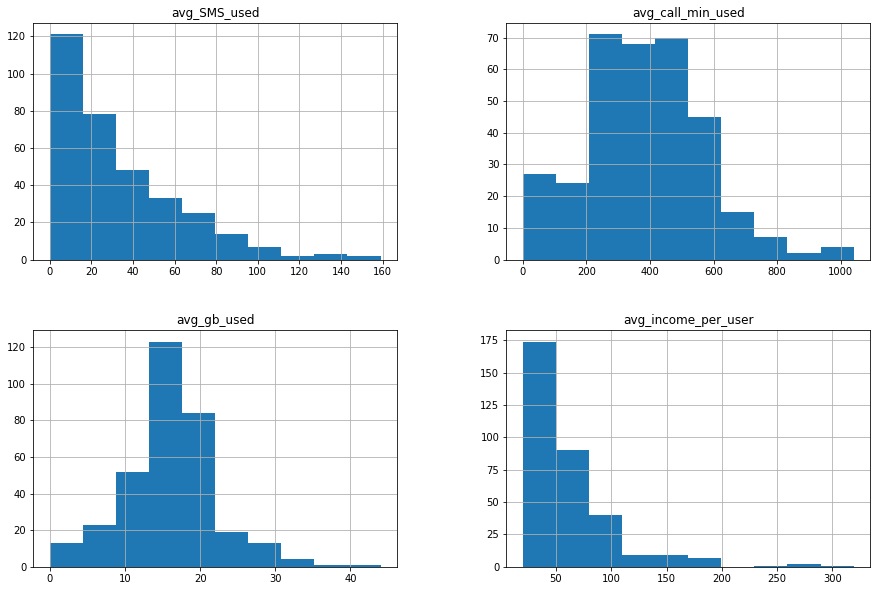

In [110]:
# Membuat histogram perilaku konsumen pelanggan surf per bulan

consumer_surf_pivot = consumer_surf.pivot_table(
    index='user_id', values=['avg_call_min_used', 'avg_SMS_used', 'avg_gb_used', 'avg_income_per_user'])
consumer_surf_pivot.hist(figsize=(15,10), bins=10)
plt.show()

* Distribusinya dataset penggunaan SMS dari pengguna surf adalah miring ke kanan, sementara distribusi penggunaan telepon dan data internet hampir simetris, namun sisi kanannya lebih rendah sedikit. 

* Selain itu, distribusi rata-rata income dari pengguna surf adalah miring ke kanan.

* Sepertinya memang terdapat outlier di dataset. Kita akan memastikan kemiringan distribusi tersebut dengan membuat boxplot dibawah ini.

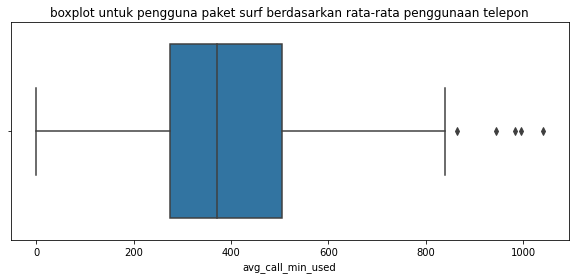

In [111]:
# Membuat boxplot untuk melihat outlier dari konsumen pelanggan surf berdasarkan rata-rata penggunaan telepon

plt.figure(figsize=(10, 4))
sns.boxplot(data=consumer_surf_pivot, x='avg_call_min_used')
plt.title('boxplot untuk pengguna paket surf berdasarkan rata-rata penggunaan telepon')
plt.show()

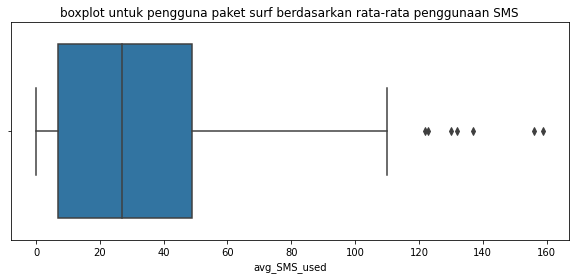

In [112]:
# Membuat boxplot untuk melihat outlier dari konsumen pelanggan surf berdasarkan rata-rata penggunaan SMS

plt.figure(figsize=(10, 4))
sns.boxplot(data=consumer_surf_pivot, x='avg_SMS_used')
plt.title('boxplot untuk pengguna paket surf berdasarkan rata-rata penggunaan SMS')
plt.show()

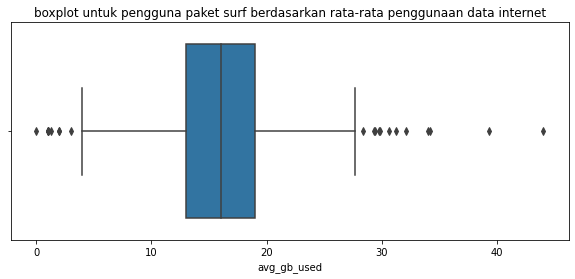

In [113]:
# Membuat boxplot untuk melihat outlier dari konsumen pelanggan surf berdasarkan rata-rata penggunaan data internet

plt.figure(figsize=(10, 4))
sns.boxplot(data=consumer_surf_pivot, x='avg_gb_used')
plt.title('boxplot untuk pengguna paket surf berdasarkan rata-rata penggunaan data internet')
plt.show()

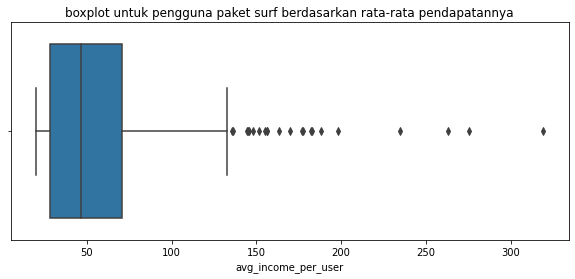

In [114]:
# Membuat boxplot untuk melihat outlier dari konsumen surf berdasarkan rata-rata pendapatannya

plt.figure(figsize=(10, 4))
sns.boxplot(data=consumer_surf_pivot, x='avg_income_per_user')
plt.title('boxplot untuk pengguna paket surf berdasarkan rata-rata pendapatannya')
plt.show()

Dari boxplot diatas, terbukti bahwa:
* Distribusi untuk penggunaan telepon dan SMS dari pengguna surf memiliki outlier disebelah dikanan.
* Boxplot untuk penggunaan data internet terlihat terdapat outlier dikedua sisi kanan dan kiri. 
* Terakhir, pada boxplot rata-rata pendapatan pengguna paket surf terlihat ada outlier mulai dari USD 130 ke arah kanan.

#### Kesimpulan untuk analisis perilaku pengguna surf

* Rata-rata pengguna paket surf membutuhkan penggunaan telepon dalam menit setiap bulannya sekitar 386 menit. Sementara, rata-rata penggunaan SMS per bulannya sebanyak 32 SMS, dan rata-rata penggunaan internet adalah sekitar 15 GB.

* Namun, standar deviasi rata-rata penggunaan SMS dan paket data terpaut sangat jauh (> 50%) dari rata-rata keseluruhan datanya. Hal ini bisa kita lihat dari masing-masing boxplot ada beberapa pengguna yang menjadi outlier, seperti pengguna yang baru menggunakan layanan paket data satu bulan saja namun kuantitas pemakaian SMS ataupun internetnya cukup tinggi, sehingga akan mempengaruhi nilai rata-rata keseluruhan data.

* Rata-rata pendapatan yang didapat dari pengguna surf sebesar USD 57.84 dengan total populasinya sebanyak 333.

* Distribusi dataset penggunaan SMS adalah miring ke kanan, sementara distribusi penggunaan telepon dan data internet hampir simetris, namun sisi kanannya lebih rendah. Hal ini dikarenakan data kita memiliki outlier.

* Kita memutuskan tidak menghapus outlier karena hanya jumlahnya yang sedikit dan karena berhubungan dengan pendapatan perusahaan.

### Perilaku konsumen pengguna paket ultimate

In [115]:
# Melihat kembali distribusi berdasarkan jenis paket telepon

income_per_user['plan_name'].value_counts()

surf        333
ultimate    157
Name: plan_name, dtype: int64

In [116]:
# Mengiris data income_per_user berdsarkan jenis paket

consumer_ultimate = income_per_user.query('plan_name == "ultimate"').reset_index()
consumer_ultimate


,index,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
0,0,1000,ultimate,1,117,11,2,70.0,117,11,2.00,70.00
1,6,1006,ultimate,2,65,154,35,154.0,32,77,17.50,77.00
2,8,1008,ultimate,3,1475,84,56,210.0,491,28,18.67,70.00
3,11,1011,ultimate,7,2748,371,132,490.0,392,53,18.86,70.00
4,13,1013,ultimate,1,204,16,20,70.0,204,16,20.00,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...
152,472,1482,ultimate,3,788,94,21,210.0,262,31,7.00,70.00
153,477,1487,ultimate,1,393,66,14,70.0,393,66,14.00,70.00
154,480,1490,ultimate,6,2127,0,191,686.0,354,0,31.83,114.33
155,483,1493,ultimate,5,2201,0,76,350.0,440,0,15.20,70.00


In [117]:
# Melihat gambaran umum dari consumer_ultimate
# Mendapatkan rata-rata dan standar deviasi dari consumer_ultimate

consumer_ultimate.describe()

,index,user_id,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,251.980892,1256.573248,4.585987,1865.146497,172.210191,79.369427,331.630573,385.152866,38.350318,16.155287,71.823312
std,147.707979,150.734705,2.959220,1605.067076,199.199553,66.369912,224.422258,189.286283,32.891599,5.782411,7.424547
min,0.000000,1000.000000,1.000000,0.000000,0.000000,1.000000,70.000000,0.000000,0.000000,1.000000,70.000000
25%,125.000000,1126.000000,2.000000,686.000000,22.000000,30.000000,140.000000,262.000000,11.000000,12.500000,70.000000
50%,247.000000,1250.000000,4.000000,1370.000000,98.000000,61.000000,280.000000,392.000000,32.000000,15.670000,70.000000
75%,387.000000,1395.000000,7.000000,2687.000000,244.000000,106.000000,490.000000,483.000000,61.000000,19.000000,70.000000
max,487.000000,1497.000000,12.000000,8032.000000,1288.000000,386.000000,1309.000000,994.000000,148.000000,35.090000,121.330000


In [118]:
# Menghitung varians  dari consumer_ultimate

np.var(consumer_ultimate)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


index                  2.167868e+04
user_id                2.257623e+04
months_used            8.701205e+00
call_minutes_used      2.559831e+06
SMS_times_used         3.942772e+04
gb_total_used          4.376908e+03
user_monthly_fee       5.004455e+04
avg_call_min_used      3.560108e+04
avg_SMS_used           1.074966e+03
avg_gb_used            3.322331e+01
avg_income_per_user    5.477279e+01
dtype: float64

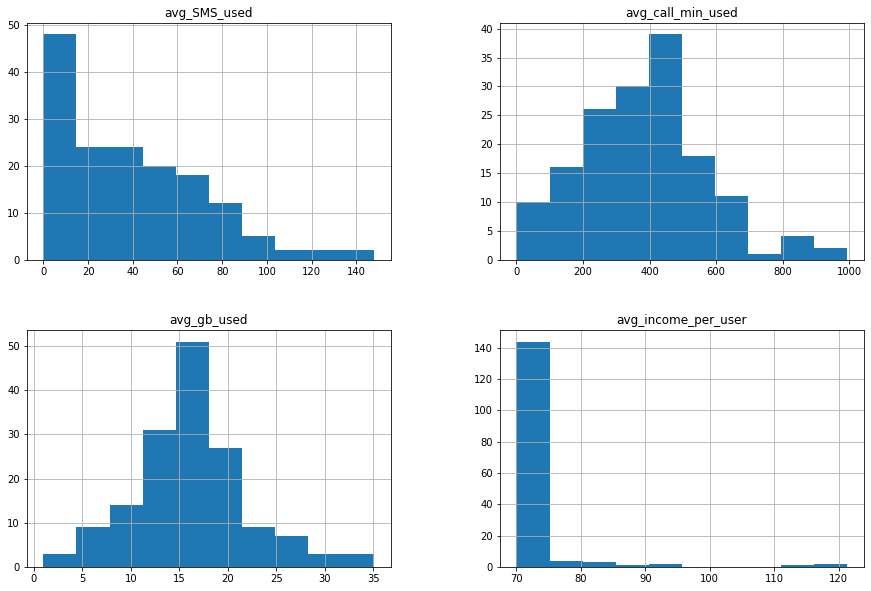

In [119]:
# Membuat histogram perilaku konsumen pelanggan ultimate per bulan

consumer_ultimate_pivot = consumer_ultimate.pivot_table(
    index='user_id', values=['avg_call_min_used', 'avg_SMS_used', 'avg_gb_used', 'avg_income_per_user'])
consumer_ultimate_pivot.hist(figsize=(15,10), bins=10)
plt.show()

* Distribusinya dataset penggunaan SMS dari pengguna ultimate adalah miring ke kanan, sementara distribusi penggunaan telepon dan data internet hampir simetris, namun sisi kanannya lebih rendah sedikit. 
* Selain itu, distribusi rata-rata income dari pengguna surf adalah berada di kiri saja dan terlihat ada outlier di bagian kanan. 
* Kita akan memastikan kemiringan distribusi tersebut dengan membuat boxplot dibawah ini.

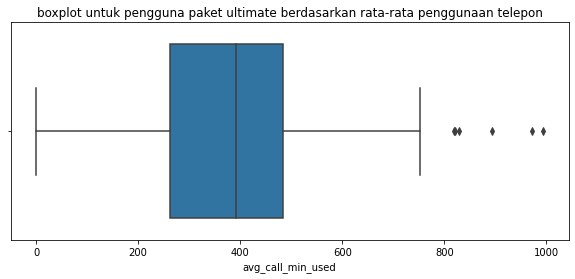

In [120]:
# Membuat boxplot untuk melihat outlier dari konsumen pelanggan ultimate berdasarkan rata-rata penggunaan telepon

plt.figure(figsize=(10, 4))
sns.boxplot(data=consumer_ultimate_pivot, x='avg_call_min_used')
plt.title('boxplot untuk pengguna paket ultimate berdasarkan rata-rata penggunaan telepon')
plt.show()

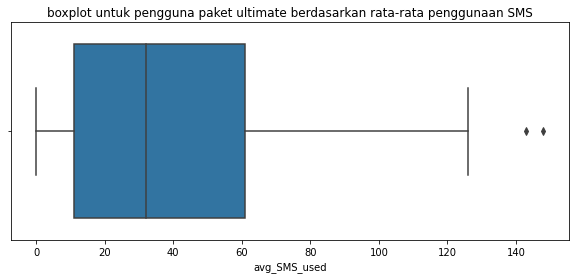

In [121]:
# Membuat boxplot untuk melihat outlier dari konsumen pelanggan ultimate berdasarkan rata-rata penggunaan SMS

plt.figure(figsize=(10, 4))
sns.boxplot(data=consumer_ultimate_pivot, x='avg_SMS_used')
plt.title('boxplot untuk pengguna paket ultimate berdasarkan rata-rata penggunaan SMS')
plt.show()

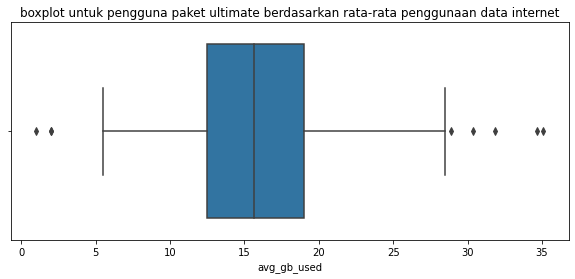

In [122]:
# Membuat boxplot untuk melihat outlier dari konsumen ultimate berdasarkan rata-rata penggunaan data internet

plt.figure(figsize=(10, 4))
sns.boxplot(data=consumer_ultimate_pivot, x='avg_gb_used')
plt.title('boxplot untuk pengguna paket ultimate berdasarkan rata-rata penggunaan data internet')
plt.show()

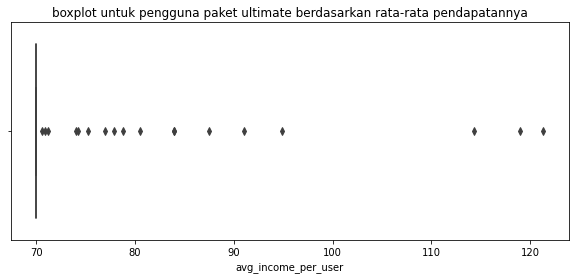

In [123]:
# Membuat boxplot untuk melihat outlier dari konsumen ultimate berdasarkan rata-rata pendapatannya

plt.figure(figsize=(10, 4))
sns.boxplot(data=consumer_ultimate_pivot, x='avg_income_per_user')
plt.title('boxplot untuk pengguna paket ultimate berdasarkan rata-rata pendapatannya')
plt.show()

Dari boxplot diatas, menunjukkan bahwa:
* Distribusi untuk penggunaan telepon dari pengguna ultimate memiliki outlier di sisi kanan
* Boxplot untuk penggunaan SMS menunjukkan outlier disebelah kanan tapi hanya sedikit, dan populasi Q3 nya lebih besar dibandingkan populasi Q1.
* Selanjutnya, untuk boxplot data internet terlihat terdapat outlier dikedua sisi kanan dan kiri. 
* Tearakhir,  pada boxplot rata-rata pendapatan pengguna paket surf terlihat datanya memang tipis di kisaran USD 70, dan outlier mulai dari USD 75 ke arah kanan.

#### Kesimpulan untuk analisis perilaku pengguna ultimate

* Rata-rata pengguna paket ultimate membutuhkan penggunaan telepon dalam menit setiap bulannya sekitar 385 menit. Sementara, rata-rata penggunaan SMS per bulannya sebanyak 38 SMS, dan rata-rata penggunaan internet adalah sekitar 16 GB.

* Namun, standar deviasi rata-rata penggunaan SMS dan paket data terpaut sangat jauh (> 50%) dari rata-rata keseluruhan datanya. Hal ini bisa kita lihat dari masing-masing boxplot ada beberapa pengguna yang menjadi outlier, seperti pengguna yang baru menggunakan layanan paket data satu bulan saja namun kuantitas pemakaian SMS ataupun internetnya cukup tinggi, sehingga akan mempengaruhi nilai rata-rata keseluruhan data.

* Rata-rata pendapatan yang didapat dari pengguna ultimate adalah USD 71.82. Meski terlihat lebih tinggi dari pengguna surf, namun populasi pengguna ultimate hanya 157 (tidak sampai 50% populasi pengguna surf).

* Sama seperti pengguna surf, distribusi dataset ultimate penggunaan SMS adalah miring ke kanan, sementara distribusi penggunaan telepon dan data internet hampir simetris, namun sisi kanannya lebih rendah. Hal ini dikarenakan data kita memiliki outlier.

* Kita memutuskan tidak menghapus outlier karena hanya jumlahnya yang sedikit dan karena berhubungan dengan pendapatan perusahaan.

## Uji Hipotesis


Kita akan melakuan dua uji hipotesis dibawah ini:
*	Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
*	Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

### Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda

* Nilai "alpha" yang akan digunakan = 0.05


* Kita akan menggunakan pendekatan hipotesis dua sample Independent (Independent T-Test) karena menggunakan dua sample yang berbeda (paket telepon Ultimate dan Surf).


* Ho = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf sama (=)

* H1 = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf tidak sama (/=)


In [124]:
# Melihat kembali data consumer_ultimate

consumer_ultimate.head()

,index,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
0,0,1000,ultimate,1,117,11,2,70.0,117,11,2.00,70.0
1,6,1006,ultimate,2,65,154,35,154.0,32,77,17.50,77.0
2,8,1008,ultimate,3,1475,84,56,210.0,491,28,18.67,70.0
3,11,1011,ultimate,7,2748,371,132,490.0,392,53,18.86,70.0
4,13,1013,ultimate,1,204,16,20,70.0,204,16,20.00,70.0


In [125]:
# Melihat kembali data consumer_surf

consumer_surf.head()

,index,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
0,1,1001,surf,5,1643,207,81,250.09,328,41,16.20,50.02
1,2,1002,surf,3,779,88,41,100.00,259,29,13.67,33.33
2,3,1003,surf,1,1041,50,27,156.23,1041,50,27.00,156.23
3,4,1004,surf,8,2622,177,157,610.00,327,22,19.62,76.25
4,5,1005,surf,1,471,11,17,40.00,471,11,17.00,40.00


In [126]:
# Menghitung varians  dari consumer_ultimate

np.var(consumer_ultimate)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


index                  2.167868e+04
user_id                2.257623e+04
months_used            8.701205e+00
call_minutes_used      2.559831e+06
SMS_times_used         3.942772e+04
gb_total_used          4.376908e+03
user_monthly_fee       5.004455e+04
avg_call_min_used      3.560108e+04
avg_SMS_used           1.074966e+03
avg_gb_used            3.322331e+01
avg_income_per_user    5.477279e+01
dtype: float64

In [127]:
# Menghitung varians  dari consumer_surf

np.var(consumer_surf)

index                  1.918186e+04
user_id                2.000291e+04
months_used            8.440188e+00
call_minutes_used      2.632131e+06
SMS_times_used         3.345771e+04
gb_total_used          3.556675e+03
user_monthly_fee       8.332643e+04
avg_call_min_used      3.538540e+04
avg_SMS_used           9.585870e+02
avg_gb_used            3.713390e+01
avg_income_per_user    1.883815e+03
dtype: float64

Varian avg_income_per_user di data consumer_ultimate dan consumer_surf berbeda (5.477279e+01 vs. 1.883812e+03). Maka untuk perhitungan uji hipotesis, equal_var diisi dengan = False.

In [128]:
# Menguji hipotesis - Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda

alpha = 0.05  # signifikansi statistik kritis

results = st.ttest_ind(consumer_ultimate['avg_income_per_user'], consumer_surf['avg_income_per_user'], 
                       equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
   print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 2.4955456484389668e-08
Kita menolak hipotesis nol


Kita menolak hipotesis nol, yang berarti rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf memang betul tidak sama. Hal ini bisa terjadi dipengaruhi oleh harga bulanan paket Ultimate dan Surf yang terpaut jauh (USD 70 vs. USD 20).

### Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain


* Nilai "alpha" yang akan digunakan = 0.05


* Kita akan menggunakan pendekatan hipotesis dua sample Independent (Independent T-Test) karena menggunakan dua sample yang berbeda (pengguna di wilayah NY-NJ dan wilayah lainnya diluar NY-NJ).


* Ho = Rata-rata pendapatan dari pengguna di wilayah NY-NJ sama dengan pendapatan pengguna dari wilayah lain (=)

* H1 = Rata-rata pendapatan dari pengguna di wilayah NY-NJ tidak sama dengan pendapatan pengguna dari wilayah lain (/=)

In [129]:
# Melihat kembali data_4 users

data_4.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,churn_year,subscription_period
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,12,12,2019,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,8,12,2019,4
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,10,12,2019,2
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,1,12,2019,11
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,5,12,2019,7


In [130]:
# Melihat distribusi pengguna per wilayah

data_4['city'].value_counts().sort_values(ascending=False)

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Raleigh-Cary, NC MSA                                1
El Paso, TX MSA                                     1
Greensboro-High Point, NC MSA                       1
Stockton, CA MSA                                    1
Cape Coral-Fort Myers, FL MSA                       1
Name: city, Length: 73, dtype: int64

Dari data diatas, menunjukkan dari 73 wilayah, wilayah NY-NJ memiliki 80 pengguna, sementara wilayahnya benar-benar terpaut jauh bahkan ada yang hanya 1 pengguna.

In [131]:
# Melihat kembali income_per_user yang berisi gabungan semua pengguna ultimate dan surf

income_per_user.head(10)

,user_id,plan_name,months_used,call_minutes_used,SMS_times_used,gb_total_used,user_monthly_fee,avg_call_min_used,avg_SMS_used,avg_gb_used,avg_income_per_user
0,1000,ultimate,1,117,11,2,70.00,117,11,2.00,70.00
1,1001,surf,5,1643,207,81,250.09,328,41,16.20,50.02
2,1002,surf,3,779,88,41,100.00,259,29,13.67,33.33
3,1003,surf,1,1041,50,27,156.23,1041,50,27.00,156.23
4,1004,surf,8,2622,177,157,610.00,327,22,19.62,76.25
5,1005,surf,1,471,11,17,40.00,471,11,17.00,40.00
6,1006,ultimate,2,65,154,35,154.00,32,77,17.50,77.00
7,1007,surf,5,2486,255,142,776.03,497,51,28.40,155.21
8,1008,ultimate,3,1475,84,56,210.00,491,28,18.67,70.00
9,1009,surf,8,5593,0,186,867.82,699,0,23.25,108.48


In [132]:
# Menggabungkan data income_per_user dengan data_4 dengan mengambil 3 kolom saja
# yaitu, kolom user_id, avg_income_per_user, dan city

income_per_user_filt = income_per_user.merge(right=data_4, on='user_id', how='left')
income_per_user_filt.drop(['months_used', 'call_minutes_used', 'SMS_times_used', 'gb_total_used', 'user_monthly_fee',
                           'avg_call_min_used', 'avg_SMS_used', 'avg_gb_used', 'first_name', 'last_name', 'age',
                           'reg_date', 'plan', 'churn_date', 'reg_month', 'churn_month', 'churn_year',
                           'subscription_period'], axis=1, inplace=True)
income_per_user_filt

,user_id,plan_name,avg_income_per_user,city
0,1000,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,50.02,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,33.33,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,156.23,"Tulsa, OK MSA"
4,1004,surf,76.25,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...
485,1495,surf,118.09,"New York-Newark-Jersey City, NY-NJ-PA MSA"
486,1496,surf,28.00,"New Orleans-Metairie, LA MSA"
487,1497,ultimate,70.00,"Los Angeles-Long Beach-Anaheim, CA MSA"
488,1498,surf,77.27,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [133]:
# Mengiris data berdasarkan wilayah NY-NJ

data_income_NY_NJ = income_per_user_filt.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"').reset_index(drop=True)
data_income_NY_NJ


,user_id,plan_name,avg_income_per_user,city
0,1014,surf,28.48,"New York-Newark-Jersey City, NY-NJ-PA MSA"
1,1022,surf,55.74,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2,1024,surf,20.93,"New York-Newark-Jersey City, NY-NJ-PA MSA"
3,1027,surf,33.33,"New York-Newark-Jersey City, NY-NJ-PA MSA"
4,1031,ultimate,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
...,...,...,...,...
74,1469,surf,100.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
75,1482,ultimate,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
76,1494,surf,30.43,"New York-Newark-Jersey City, NY-NJ-PA MSA"
77,1495,surf,118.09,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [134]:
# Melihat distribusi pengguna paket di wilayah NY_NJ

data_income_NY_NJ['plan_name'].value_counts()

surf        60
ultimate    19
Name: plan_name, dtype: int64

In [135]:
# Menghitung proporsi persebaran pengguna paket terhadap populasi data_income_NY_NJ

print('Persentase pengguna surf di wilayah NY_NJ:', len(data_income_NY_NJ.loc[data_income_NY_NJ['plan_name'] == 'surf']) / len(data_income_NY_NJ) * 100)
print('Persentase pengguna ultimate di wilayah NY_NJ:', len(data_income_NY_NJ.loc[data_income_NY_NJ['plan_name'] == 'ultimate']) / len(data_income_NY_NJ) * 100)


Persentase pengguna surf di wilayah NY_NJ: 75.9493670886076
Persentase pengguna ultimate di wilayah NY_NJ: 24.050632911392405


In [136]:
# Mengiris data berdasarkan wilayah diluar NY-NJ

data_income_non_NY_NJ = income_per_user_filt.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"').reset_index(drop=True)
data_income_non_NY_NJ


,user_id,plan_name,avg_income_per_user,city
0,1000,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,50.02,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,33.33,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,156.23,"Tulsa, OK MSA"
4,1004,surf,76.25,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...
406,1492,surf,25.00,"Portland-Vancouver-Hillsboro, OR-WA MSA"
407,1493,ultimate,70.00,"Boston-Cambridge-Newton, MA-NH MSA"
408,1496,surf,28.00,"New Orleans-Metairie, LA MSA"
409,1497,ultimate,70.00,"Los Angeles-Long Beach-Anaheim, CA MSA"


In [137]:
# Melihat distribusi pengguna paket di wilayah diluar NY_NJ

data_income_non_NY_NJ['plan_name'].value_counts()

surf        273
ultimate    138
Name: plan_name, dtype: int64

In [138]:
# Menghitung proporsi persebaran pengguna paket terhadap populasi data_income_NY_NJ

print('Persentase pengguna surf di wilayah selain NY_NJ:', len(data_income_non_NY_NJ.loc[data_income_non_NY_NJ['plan_name'] == 'surf']) / len(data_income_non_NY_NJ) * 100)
print('Persentase pengguna ultimate di wilayah selain NY_NJ:', len(data_income_non_NY_NJ.loc[data_income_non_NY_NJ['plan_name'] == 'ultimate']) / len(data_income_non_NY_NJ) * 100)


Persentase pengguna surf di wilayah selain NY_NJ: 66.42335766423358
Persentase pengguna ultimate di wilayah selain NY_NJ: 33.57664233576642


Persebaran pengguna di wilayah NY_NJ maupun diluar wilayah NY_NJ kurang lebihnya sama, dimana pengguna surf lebih banyak daripada pengguna ultimate.

In [139]:
# Menghitung varians  dari data_income_NY_NJ_sample

np.var(data_income_NY_NJ)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


user_id                20786.314373
avg_income_per_user     1058.482811
dtype: float64

In [140]:
# Menghitung varians  dari data_income_NY_NJ_sample

np.var(data_income_non_NY_NJ)

user_id                20741.467562
avg_income_per_user     1392.815220
dtype: float64

Varian avg_income_per_user di data data_income_NY_NJ dan data_income_non_NY_NJ berbeda (1058.453104 vs. 1392.818633). Maka untuk perhitungan uji hipotesis, equal_var diisi dengan = False.

In [141]:
# Menguji hipotesis - Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan
# pendapatan pengguna dari wilayah lain

alpha = 0.05  # signifikansi statistik kritis

results = st.ttest_ind(data_income_NY_NJ['avg_income_per_user'], data_income_non_NY_NJ['avg_income_per_user'],
                       equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.43119147292913085
Kita tidak dapat menolak hipotesis nol


Hasil uji hipotesis kedua adalah kita tidak dapat menolak hipotesis nol, yang berarti rata-rata pendapatan dari pengguna di wilayah NY-NJ adalah sama dengan pendapatan pengguna dari wilayah lain. Hal ini bisa saja terjadi dikarenakan: 

* Persebaran pengguna di wilayah NY_NJ maupun diluar wilayah NY_NJ kurang lebihnya sama, dimana pengguna surf lebih banyak daripada pengguna ultimate.
* Ditambah lagi, rata-rata penggunaan paket telepon, SMS, dan data internet setiap pengguna sama, terlepas itu pengguna surf maupun ultimate.

## Kesimpulan Menyeluruh

**1. Pada bagian pra-pemrosesan data:**
* Tipe data yang tidak sesuai adalah semua kolom yang berhubungan dengan tanggal, yaitu kolom call_date, session_date, message_date, reg_date, dan churn_date. Semuanya diperbaiki dengan mengubahnya ke tipe datetime.

* Nilai-nilai yang hilang di kolom churn_date sebesar 93.2% terhadap data_4 users, ditangani dengan mengisinya dengan tanggal setelah data ini dibuat, agar mudah diingat dipilihlah tanggal 2019-01-01.

* Kolom duration di data_1 calls memiliki nilai 0,0 menit, kami asumsikan itu adalah panggilan telepon yang tidak terjawab. Kami menanganinya dengan membuat kolom baru duration_category dengan value 1= untuk panggilan terjawab, value 0= untuk panggilan tidak terjawab.

* Tidak ada data duplikat di kelima dataset asli.

**2. Pada bagian menyiapkan data untuk keperluan analisa:**
* Kita menemukan bahwa ada pengguna yang tidak memiliki history telepon, SMS, dan data internet pada bulan pertama kali dia registasi. Hal ini, membuat kita ragu apakah kolom reg_date yang dimaksud adalah tanggal registrasi kartu atau memang ada kesalahan sistem dalam penarikan data. Karena hal tersebut, kita memutuskan untuk mengambil rata-rata pemakaian untuk menghitung rata-rata biaya bulanan para pengguna berdasarkan periode mereka memakai layanan telepon, SMS, dan internet.

* Rata-rata jumlah panggilan telepon yang dilakukan per pengguna per bulannya adalah sekitar 385 menit.

* Rata-rata jumlah SMS yang dikirim per pengguna per bulan adalah sekitar 34 SMS.

* Rata-rata pemakaian data internet per pengguna per bulan adalah sekitar 16 GB.

* Rata-rata pendapatan perusahaan dari masing-masing pengguna sesuai dengan masa pemakaian paket layananan adalah USD 62.32.

* Sementara dari 500 users, terdapat 490 users yang sudah menggunakan paket layananan, sisanya 10 users kita asumsikan belum melakukan pengaktifan paket (hanya baru registrasi kartu).

**3. Pada bagian analisis data - Perilaku Konsumen:**

* Berdasarkan hasil analisis, perilaku konsumen baik dari pengguna paket surf maupun ultimate adalah hampir sama. Setiap bulannya, para pengguna memiliki keperluan telepon dikisaran 385-386 menit, 32-38 SMS, dan pemakaian data internet sekitar 15-16 GB.
    
* Berdasarkan hasil analisis, pendapatan perusahaan dari rata-rata antara pengguna surf dan ultimate terlihat berbeda, masing-masing dikisaran USD 57.84 dan USD 71.82. Namun, pada dataset kita mengetahui bahwa populasi pengguna surf 100% lebih, lebih banyak dari pengguna ultimate (157 vs. 333).

* Meski terdapat outlier di dataset, kita memutuskan tidak menghapus outlier karena jumlahnya yang sedikit dan karena ini berhubungan dengan pendapatan perusahaan.


**4. Hasil Uji Hipotesis:**

* Atas hasil dari pengujian dua hipotesis, uji hipotesis pertama kita menolak hipotesis nol, yang berarti rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf memang tidak sama. Hal ini bisa terjadi dipengaruhi oleh harga bulanan paket Ultimate dan Surf yang terpaut jauh (USD 70 vs. USD 20).
    
* Sementara, pada uji hipotesis kedua kita tidak dapat menolak Ho yang artinya rata-rata pendapatan dari pengguna di wilayah NY-NJ adalah sama dengan pendapatan pengguna dari wilayah lain.


**5. Input yang dapat diberikan:**
   
   Atas hasil analisa data dan hasil uji hipotesis, yang dapat kita rekomendasikan kepada Departemen Periklanan diantaranya:
   
* Paket ultimate lebih banyak mendatangkan pendapatan, karena analisis datanya memberitahu kita bahwa perilaku penggunaan paket telepon bagi pengguna ultimate dan surf adalah hampir sama, sehingga harga paket ultimate yang jauh lebih mahal meskipun kuota yang diberikan lebih banyak tidak berpengaruh kepada behavior pemakaian telepon dari si pengguna. Sehingga Dept. Periklanan dapat menyesuaikan anggaran iklan bagi kedua paket tersebut.
   
* Dept. Periklanan juga bisa memfokuskan iklan di 72 wilayah lain selain NY-NJ, karena data mengatakan tidak ada perbedaan rata-rata pendapatan antara wilayah NY-NJ dengan wilayah lainnya. Jika perusahaan bisa mendapatkan konsumen di masing-masing 72 wilayah lain yang jumlahnya setara dengan di wilayah NY-NJ (80 pengguna), maka dapat dibayangkan bahwa setelah itu income perusahaan akan meningkat sangat amat pesat. Tidak ada salahnya juga apabila difokuskan untuk meningkatkan lebih banyak pemakai yang bisa menjadi pengguna ultimate.
   